# Forecasting Future Gains: Identifying Top 3 Investment Zipcodes in the Baltimore-Washington Area Using Zillow Time Series Data

- 07/18/24


### Introduction

In an era where data-driven decision-making is paramount, real estate investments stand to benefit significantly from advanced data science techniques. This project aims to leverage Zillow zipcode data to identify the top three zipcodes in the Baltimore-Washington area that promise the greatest return on investment (ROI) three years post-purchase. By employing the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, we will ensure a structured and thorough approach to our analysis, ensuring reliable and actionable insights for potential investors.



### CRISP-DM Overview

The CRISP-DM methodology consists of six major phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. Each phase is integral to the success of the project and is described in detail below.

#### 1. Business Understanding

**Objective:**  
The primary objective of this project is to identify the top three zipcodes in the Baltimore-Washington area that are predicted to offer the highest return on investment (ROI) for home buyers over a three-year period. The purchase cost is negligible due to the

**Key Questions:**
- What zipcodes have shown the greatest increase in typical home value, as assessed by Zillow, in the Baltimore-Washington area over the last 5 years ?
    - Of these zipcodes, select the top `5-10` that showed the highest percent increase in home value over the past 5 years.
    - `Consider the invesement cost of these zipcodes`
- What are the top three zipcodes that show the highest potential for ROI when forecasting 3 years into the future?

**Success Criteria:**
- Identification of top three zipcodes with the highest predicted ROI.
- Development of a robust predictive model with high accuracy and reliability.



#### 2. Data Understanding

**Objective:**  
To gather and understand the data required for the analysis. This involves exploring Zillow's zipcode-level data and other relevant datasets.

**Tasks:**
- Collect Zillow data, including historical home prices, sales trends, and economic indicators for the Baltimore-Washington area.
- Explore additional data sources such as crime rates, school quality, and local amenities.
- Conduct initial data exploration to understand the distribution, trends, and potential issues within the data.

**Deliverables:**
- Data collection report detailing sources, data types, and initial findings.
- Exploratory data analysis (EDA) report with visualizations and summary statistics.



#### 3. Data Preparation

**Objective:**  
To clean, preprocess, and transform the data for analysis.

**Tasks:**
- Handle missing values, outliers, and inconsistencies in the data.
- Normalize and standardize numerical features.
- Encode categorical variables.
- Feature engineering to create new variables that may enhance the predictive power of the model.

**Deliverables:**
- Cleaned and preprocessed dataset ready for modeling.
- Feature engineering documentation.



#### 4. Modeling

**Objective:**  
To develop predictive models that can accurately forecast the ROI for different zipcodes.

**Tasks:**
- Select appropriate modeling techniques (e.g., linear regression, decision trees, ensemble methods).
- Train and validate models using historical data.
- Optimize model parameters and assess performance using metrics such as RMSE, MAE, and R-squared.

**Deliverables:**
- Trained predictive models.
- Model performance report with evaluation metrics.



#### 5. Evaluation

**Objective:**  
To evaluate the performance of the models and ensure they meet the business objectives.

**Tasks:**
- Compare model predictions with actual outcomes on a validation dataset.
- Conduct a detailed analysis of the top three zipcodes identified by the model.
- Assess the model's generalizability and potential for real-world application.

**Deliverables:**
- Evaluation report with insights on model accuracy and reliability.
- Recommendations for the top three zipcodes for investment.



#### 6. Deployment

**Objective:**  
To deploy the predictive model and communicate the results to stakeholders.

**Tasks:**
- Develop a dashboard or interactive tool for stakeholders to explore the results.
- Create documentation and user guides for the deployed solution.
- Present findings and recommendations to potential investors.

**Deliverables:**
- Interactive dashboard or web application.
- Final report and presentation summarizing the project outcomes and recommendations.


# Data Collection/Understanding

Certainly! Here's a step-by-step guide to using Zillow's typical home value datasets for your project:

### Step-by-Step Guide to Using Zillow's Typical Home Value Datasets

#### Step 1: Data Acquisition

**Objective:** Obtain the necessary Zillow home value data and other relevant datasets.

**Tasks:**
1. **Download Zillow Data:**
   - Visit the Zillow Research Data page: [Zillow Data](https://www.zillow.com/research/data/)
   - Look for datasets under "Home Values" such as "ZHVI Single Family Homes Time Series" or similar.
   - Download the relevant CSV files that contain historical home values at the zipcode level for the Baltimore-Washington area.

2. **Obtain Additional Data:**
   - Gather supplementary datasets that might affect home values, such as crime rates, school quality, economic indicators, etc.

#### Step 2: Data Understanding

**Objective:** Explore and understand the structure, content, and initial insights from the datasets.

### HOME VALUES

**Zillow Home Value Index (ZHVI):** A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.

Zillow publishes top-tier ZHVI (\$, typical value for homes within the 65th to 95th percentile range for a given region) and bottom-tier ZHVI (\$, typical value for homes within the 5th to 35th percentile range for a given region).

Zillow also publishes ZHVI for all single-family residences (\$, typical value for all single-family homes in a given region), for condo/coops (\$), for all homes with 1, 2, 3, 4 and 5+ bedrooms (\$), and the ZHVI per square foot (\$, typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage).

**Note:** Starting with the January 2023 data release, and for all subsequent releases, the full ZHVI time series has been upgraded to harness the power of the [neural Zestimate](https://zillow.mediaroom.com/2021-06-15-Zillow-Launches-New-Neural-Zestimate,-Yielding-Major-Accuracy-Gains).

More information about what ZHVI is and how it’s calculated is available on [this overview page](https://www.zillow.com/research/methodology-neural-zhvi-32128). Here’s a handy [ZHVI User Guide](https://www.zillow.com/research/zhvi-user-guide/) for information about properly citing and making calculations with this metric.


![png](images/data-selection.png)

In [294]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa

In [295]:
# Load the dat
df_wide = pd.read_csv('data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_wide

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,214724.296983,...,495508.468732,496775.273604,497480.808242,498108.355423,499513.840126,501722.478754,504594.794999,507170.130369,508512.211208,508825.477602
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,137728.299476,...,566107.250697,573469.272028,580290.890399,585073.452329,586662.044177,589227.402896,594340.234957,602667.273772,610030.631370,615467.664218
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,104976.099896,...,282592.165439,282581.794849,282343.242309,282047.654956,282407.430360,283117.403667,284228.579526,285200.832251,285741.575496,285701.327874
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,148116.649679,...,460261.789526,458234.332255,454878.865185,450590.949525,447761.148606,446156.518854,449217.967295,453730.457014,458355.229588,459058.239341
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,103962.845670,...,277359.965391,277350.131337,276921.643696,276491.562564,276538.335078,277072.092199,278088.397022,279095.026992,279604.806899,279435.505967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26339,63527,39992,14441,zip,NY,NY,Dresden,"Rochester, NY",Yates County,102928.812060,...,226393.877319,227018.891779,226844.125790,224896.505309,222272.335658,219865.320543,220686.431436,224249.009672,230139.106238,235378.350943
26340,64705,39992,16682,zip,PA,PA,Sproul,"Altoona, PA",Blair County,NaN,...,95211.507588,96263.067498,97235.553270,97846.827416,97845.892098,97616.587215,97995.179015,99914.927295,102348.053469,105642.477308
26341,78282,39992,46799,zip,IN,IN,Zanesville,"Bluffton, IN",Wells County,NaN,...,185082.171523,185287.469865,185197.559384,185043.783911,185395.716522,186849.852797,189366.188721,191778.230798,193638.478474,194479.590782
26342,67377,39992,22731,zip,VA,VA,Aroda,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Madison County,NaN,...,359176.982649,360831.175271,361726.709869,362105.931541,361472.628756,361685.880832,363633.897396,367535.555726,372041.654024,375746.672329


In [296]:
df_wide['Metro'].value_counts().head(20)

New York-Newark-Jersey City, NY-NJ-PA           830
Chicago-Naperville-Elgin, IL-IN-WI              376
Los Angeles-Long Beach-Anaheim, CA              360
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD     334
Washington-Arlington-Alexandria, DC-VA-MD-WV    314
Pittsburgh, PA                                  296
Boston-Cambridge-Newton, MA-NH                  272
Dallas-Fort Worth-Arlington, TX                 251
Houston-The Woodlands-Sugar Land, TX            219
Minneapolis-St. Paul-Bloomington, MN-WI         217
Detroit-Warren-Dearborn, MI                     213
St. Louis, MO-IL                                211
Atlanta-Sandy Springs-Alpharetta, GA            203
Kansas City, MO-KS                              183
Miami-Fort Lauderdale-Pompano Beach, FL         181
San Francisco-Oakland-Berkeley, CA              166
Seattle-Tacoma-Bellevue, WA                     156
Cincinnati, OH-KY-IN                            149
Phoenix-Mesa-Chandler, AZ                       149
Baltimore-Co

In [297]:
metro_regions = ("Washington-Arlington-Alexandria, DC-VA-MD-WV", "Baltimore-Columbia-Towson, MD")
filter_metro = df_wide['Metro'].isin(metro_regions)
df_wide = df_wide.loc[filter_metro]
df_wide

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30
78,67182,80,22193,zip,VA,VA,Woodbridge,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Prince William County,150722.185246,...,469994.678661,471728.354561,472879.215479,473899.597515,474834.223816,476626.657659,479792.310573,484216.538553,488417.494205,491351.596144
159,67180,165,22191,zip,VA,VA,Woodbridge,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Prince William County,152074.973318,...,451844.195953,453673.566444,454793.268411,455588.986737,456272.526695,457781.412332,460624.712297,464290.950403,467623.303339,469785.439440
168,66126,174,20002,zip,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,142819.862432,...,675118.625192,673059.135385,669583.790317,665497.751397,661791.368551,660499.554308,661008.309722,661153.655269,659313.373342,654956.248130
193,66705,199,20906,zip,MD,MD,Silver Spring,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,163662.446807,...,430943.958205,430587.447746,430356.171428,430717.323582,431240.729188,432396.340468,434779.745464,438011.216890,440359.842350,441198.508957
262,66843,268,21234,zip,MD,MD,Parkville,"Baltimore-Columbia-Towson, MD",Baltimore County,114803.595868,...,285809.157849,286772.794227,287484.388958,287816.030574,288273.696199,289313.713744,291447.693826,293719.624620,295369.373645,295506.629210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,66752,39992,21052,zip,MD,MD,Fort Howard,"Baltimore-Columbia-Towson, MD",Baltimore County,NaN,...,323810.847794,324129.353357,323619.630044,322780.329732,322192.958388,322507.173030,323975.876966,325729.583106,326707.309900,326245.809048
26246,66615,39992,20765,zip,MD,MD,Galesville,"Baltimore-Columbia-Towson, MD",Anne Arundel County,236180.620462,...,626359.994438,626649.032501,625895.006825,625813.027311,625531.026790,627250.382520,631675.768596,637210.986658,640956.497622,642193.219457
26310,67330,39992,22623,zip,VA,VA,Chester Gap,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Rappahannock County,NaN,...,299170.435203,301946.307955,304148.237283,307083.971427,310661.604957,314478.642416,317632.158940,319743.272821,321895.814480,323968.001664
26338,67368,39992,22722,zip,VA,VA,Haywood,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Madison County,NaN,...,369369.037487,369939.627025,370098.048769,370211.465892,369894.623903,370449.465137,373483.063016,377817.289200,382770.177483,386334.685064


In [298]:
# Filter for Maryland
df_md = df_wide.loc[df_wide['State'] == 'MD']
df_md['RegionName'] = df_md['RegionName'].astype(str)

# Save the zipcodes
zipcodes = df_md['RegionName'].unique()
len(zipcodes)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_7814/2907951597.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



281

- There are 281 zipcodes located within MD's Baltimore/DC Metro regions.

## Convert Time Series to Long Form

In [299]:
for i, val in enumerate(df_md.columns):
    print(f"{i}) {val}")

0) RegionID
1) SizeRank
2) RegionName
3) RegionType
4) StateName
5) State
6) City
7) Metro
8) CountyName
9) 2000-01-31
10) 2000-02-29
11) 2000-03-31
12) 2000-04-30
13) 2000-05-31
14) 2000-06-30
15) 2000-07-31
16) 2000-08-31
17) 2000-09-30
18) 2000-10-31
19) 2000-11-30
20) 2000-12-31
21) 2001-01-31
22) 2001-02-28
23) 2001-03-31
24) 2001-04-30
25) 2001-05-31
26) 2001-06-30
27) 2001-07-31
28) 2001-08-31
29) 2001-09-30
30) 2001-10-31
31) 2001-11-30
32) 2001-12-31
33) 2002-01-31
34) 2002-02-28
35) 2002-03-31
36) 2002-04-30
37) 2002-05-31
38) 2002-06-30
39) 2002-07-31
40) 2002-08-31
41) 2002-09-30
42) 2002-10-31
43) 2002-11-30
44) 2002-12-31
45) 2003-01-31
46) 2003-02-28
47) 2003-03-31
48) 2003-04-30
49) 2003-05-31
50) 2003-06-30
51) 2003-07-31
52) 2003-08-31
53) 2003-09-30
54) 2003-10-31
55) 2003-11-30
56) 2003-12-31
57) 2004-01-31
58) 2004-02-29
59) 2004-03-31
60) 2004-04-30
61) 2004-05-31
62) 2004-06-30
63) 2004-07-31
64) 2004-08-31
65) 2004-09-30
66) 2004-10-31
67) 2004-11-30
68) 2004-12

In [300]:
id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName']
value_cols=  df_md.columns[6:]

df = pd.melt(df_md, id_vars=id_vars , value_vars=value_cols, var_name='Month', value_name='HomeValue')
df

,RegionName,City,State,Metro,CountyName,Month,HomeValue
0,20906,Silver Spring,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.636624e+05
1,21234,Parkville,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.148036e+05
2,20878,Gaithersburg,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,2.533091e+05
3,20874,Germantown,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.509697e+05
4,21117,Owings Mills,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.610868e+05
...,...,...,...,...,...,...,...
82609,21051,Hydes,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,5.278740e+05
82610,20812,Glen Echo,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2024-06-30,1.266162e+06
82611,21762,Union Bridge,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Frederick County,2024-06-30,3.307898e+05
82612,21052,Fort Howard,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,3.262458e+05


In [301]:
df['CountyName'].value_counts()

Montgomery County        12936
Baltimore County         11172
Anne Arundel County       9996
Prince Georges County     9702
Frederick County          6762
Charles County            6174
Baltimore City            5586
Howard County             5586
Harford County            4704
Calvert County            3822
Queen Annes County        3234
Carroll County            2940
Name: CountyName, dtype: int64

In [302]:
## Process as time series
df['Month'] = pd.to_datetime(df['Month'])#, format='%Y-%m')
df


,RegionName,City,State,Metro,CountyName,Month,HomeValue
0,20906,Silver Spring,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.636624e+05
1,21234,Parkville,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.148036e+05
2,20878,Gaithersburg,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,2.533091e+05
3,20874,Germantown,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.509697e+05
4,21117,Owings Mills,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.610868e+05
...,...,...,...,...,...,...,...
82609,21051,Hydes,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,5.278740e+05
82610,20812,Glen Echo,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2024-06-30,1.266162e+06
82611,21762,Union Bridge,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Frederick County,2024-06-30,3.307898e+05
82612,21052,Fort Howard,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,3.262458e+05


In [303]:
df_ts = df.set_index(['RegionName', 'Month'])
df_ts = df_ts['HomeValue'].unstack(level=0)#.plot(legend=False, figsize=(12, 6))
df_ts

RegionName,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,...,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,
2000-01-31,171919.785078,139128.334503,188899.959888,227263.649189,162252.439039,182756.374355,NaN,206038.738603,NaN,178515.370644,...,173192.376503,159769.632506,191125.727842,151242.878908,134075.292937,156695.050853,155421.955997,3.450278e+05,266828.885208,170176.720097
2000-02-29,172009.486335,139031.505262,188845.106047,226669.844031,160996.536994,182909.528737,NaN,205781.044948,NaN,178468.752999,...,173655.048574,160018.544215,191145.628393,151400.224340,134267.398270,156714.444996,155134.725496,3.452601e+05,267525.746221,169771.309663
2000-03-31,172342.499785,139225.168544,188988.549654,226446.312119,160427.370081,183113.853278,NaN,205728.515414,NaN,178568.430810,...,173229.737880,159627.356229,191238.078406,151807.509753,134326.785554,156972.415670,155205.652855,3.457071e+05,267588.245616,169500.048425
2000-04-30,172990.719516,139601.597772,189403.366509,225968.230758,159390.467228,183399.832185,NaN,205363.962195,NaN,179029.821237,...,173015.032745,159747.838667,191636.560338,152435.871550,134495.898747,157605.895343,155384.726585,3.463587e+05,268083.564673,169016.255322
2000-05-31,174068.534310,140355.782422,190244.169728,226237.334450,158536.338422,183610.582179,NaN,205426.933434,NaN,179799.676277,...,172306.345493,160212.398766,192625.887349,153224.661245,134891.254203,158516.280131,155956.218070,3.465630e+05,268414.213062,169508.004708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,424642.539119,380632.081252,473624.779705,533113.345804,421563.004748,446172.773563,340711.412838,516258.721826,468051.689171,410316.399156,...,428136.129867,358556.510078,527875.389317,371767.783077,363059.703458,422513.196569,443096.873129,9.801453e+05,760177.388112,479539.812379
2024-03-31,427199.776322,382850.984368,475910.368581,535484.166085,424396.883764,448344.438250,342789.566840,518801.706524,469749.509935,412785.353974,...,431940.470230,361366.769494,532214.397273,374842.811348,365161.489113,425981.928277,446301.990867,9.878256e+05,764982.099959,483794.634204
2024-04-30,430124.237798,385500.407407,478840.299735,539081.461442,428267.934846,452373.944107,345057.515593,522563.232658,473018.961023,415199.282020,...,436630.629252,365982.827730,537064.040298,377787.674017,367835.847577,430174.843797,450094.964339,9.991780e+05,772600.445412,489037.378809


In [304]:
df_ts.columns.name =  None
df_ts

,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,...,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,
2000-01-31,171919.785078,139128.334503,188899.959888,227263.649189,162252.439039,182756.374355,NaN,206038.738603,NaN,178515.370644,...,173192.376503,159769.632506,191125.727842,151242.878908,134075.292937,156695.050853,155421.955997,3.450278e+05,266828.885208,170176.720097
2000-02-29,172009.486335,139031.505262,188845.106047,226669.844031,160996.536994,182909.528737,NaN,205781.044948,NaN,178468.752999,...,173655.048574,160018.544215,191145.628393,151400.224340,134267.398270,156714.444996,155134.725496,3.452601e+05,267525.746221,169771.309663
2000-03-31,172342.499785,139225.168544,188988.549654,226446.312119,160427.370081,183113.853278,NaN,205728.515414,NaN,178568.430810,...,173229.737880,159627.356229,191238.078406,151807.509753,134326.785554,156972.415670,155205.652855,3.457071e+05,267588.245616,169500.048425
2000-04-30,172990.719516,139601.597772,189403.366509,225968.230758,159390.467228,183399.832185,NaN,205363.962195,NaN,179029.821237,...,173015.032745,159747.838667,191636.560338,152435.871550,134495.898747,157605.895343,155384.726585,3.463587e+05,268083.564673,169016.255322
2000-05-31,174068.534310,140355.782422,190244.169728,226237.334450,158536.338422,183610.582179,NaN,205426.933434,NaN,179799.676277,...,172306.345493,160212.398766,192625.887349,153224.661245,134891.254203,158516.280131,155956.218070,3.465630e+05,268414.213062,169508.004708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,424642.539119,380632.081252,473624.779705,533113.345804,421563.004748,446172.773563,340711.412838,516258.721826,468051.689171,410316.399156,...,428136.129867,358556.510078,527875.389317,371767.783077,363059.703458,422513.196569,443096.873129,9.801453e+05,760177.388112,479539.812379
2024-03-31,427199.776322,382850.984368,475910.368581,535484.166085,424396.883764,448344.438250,342789.566840,518801.706524,469749.509935,412785.353974,...,431940.470230,361366.769494,532214.397273,374842.811348,365161.489113,425981.928277,446301.990867,9.878256e+05,764982.099959,483794.634204
2024-04-30,430124.237798,385500.407407,478840.299735,539081.461442,428267.934846,452373.944107,345057.515593,522563.232658,473018.961023,415199.282020,...,436630.629252,365982.827730,537064.040298,377787.674017,367835.847577,430174.843797,450094.964339,9.991780e+05,772600.445412,489037.378809


In [305]:
### Save the data 
df_ts.to_csv('data/MD_Zip_HomeValue.csv.gz', compression='gzip')
df_ts = pd.read_csv('data/MD_Zip_HomeValue.csv.gz', index_col=0, parse_dates=['Month'])
df_ts

,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,...,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,
2000-01-31,171919.785078,139128.334503,188899.959888,227263.649189,162252.439039,182756.374355,NaN,206038.738603,NaN,178515.370644,...,173192.376503,159769.632506,191125.727842,151242.878908,134075.292937,156695.050853,155421.955997,3.450278e+05,266828.885208,170176.720097
2000-02-29,172009.486335,139031.505262,188845.106047,226669.844031,160996.536994,182909.528737,NaN,205781.044948,NaN,178468.752999,...,173655.048574,160018.544215,191145.628393,151400.224340,134267.398270,156714.444996,155134.725496,3.452601e+05,267525.746221,169771.309663
2000-03-31,172342.499785,139225.168544,188988.549654,226446.312119,160427.370081,183113.853278,NaN,205728.515414,NaN,178568.430810,...,173229.737880,159627.356229,191238.078406,151807.509753,134326.785554,156972.415670,155205.652855,3.457071e+05,267588.245616,169500.048425
2000-04-30,172990.719516,139601.597772,189403.366509,225968.230758,159390.467228,183399.832185,NaN,205363.962195,NaN,179029.821237,...,173015.032745,159747.838667,191636.560338,152435.871550,134495.898747,157605.895343,155384.726585,3.463587e+05,268083.564673,169016.255322
2000-05-31,174068.534310,140355.782422,190244.169728,226237.334450,158536.338422,183610.582179,NaN,205426.933434,NaN,179799.676277,...,172306.345493,160212.398766,192625.887349,153224.661245,134891.254203,158516.280131,155956.218070,3.465630e+05,268414.213062,169508.004708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,424642.539119,380632.081252,473624.779705,533113.345804,421563.004748,446172.773563,340711.412838,516258.721826,468051.689171,410316.399156,...,428136.129867,358556.510078,527875.389317,371767.783077,363059.703458,422513.196569,443096.873129,9.801453e+05,760177.388112,479539.812379
2024-03-31,427199.776322,382850.984368,475910.368581,535484.166085,424396.883764,448344.438250,342789.566840,518801.706524,469749.509935,412785.353974,...,431940.470230,361366.769494,532214.397273,374842.811348,365161.489113,425981.928277,446301.990867,9.878256e+05,764982.099959,483794.634204
2024-04-30,430124.237798,385500.407407,478840.299735,539081.461442,428267.934846,452373.944107,345057.515593,522563.232658,473018.961023,415199.282020,...,436630.629252,365982.827730,537064.040298,377787.674017,367835.847577,430174.843797,450094.964339,9.991780e+05,772600.445412,489037.378809


In [306]:
# Save the start and end date
start_date = df_ts.index[0] 
last_date = df_ts.index[-1]
print(f"{start_date} -  {last_date}")   

2000-01-31 00:00:00 -  2024-06-30 00:00:00


In [307]:
# Calculate pct_change in home value for the last 5 years
time_period = df_ts.index[-(5 * 12)]
time_period

Timestamp('2019-07-31 00:00:00')

In [308]:
# Calculate percent change over last 5 years
df_ts_pct_change = df_ts.loc[time_period:].pct_change()
df_ts_pct_change

,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,...,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,
2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31,0.002765,0.003819,0.002250,0.005923,0.008822,0.003724,NaN,0.002627,NaN,0.001012,...,0.005681,0.003675,0.000772,0.002064,-0.000595,0.001152,-0.000251,0.001321,-0.000639,0.000767
2019-09-30,0.002364,0.003959,0.001964,0.006481,0.004626,0.001132,NaN,0.000918,NaN,0.000042,...,0.004419,0.002350,0.000859,0.001254,-0.000131,0.001498,-0.000301,0.000230,-0.000396,0.001084
2019-10-31,0.001232,0.004218,0.001432,0.006160,0.001575,-0.001497,NaN,0.000266,NaN,0.000886,...,-0.001211,0.001381,0.001049,0.000102,-0.001874,0.001290,-0.000220,0.000215,0.000453,0.002109
2019-11-30,0.001294,0.004499,0.001999,0.004668,-0.000805,-0.001170,NaN,0.001187,NaN,0.001759,...,-0.003413,0.001981,0.001065,0.000998,-0.000012,0.002172,0.000644,-0.000206,0.000228,0.002268
2019-12-31,0.002613,0.004584,0.003060,0.003839,-0.001278,0.001004,NaN,0.002677,NaN,0.003258,...,-0.002888,0.002516,0.001727,0.002112,0.001965,0.001223,0.001608,0.001185,0.000157,0.002685
2020-01-31,0.004260,0.005716,0.004850,0.004449,-0.002657,0.002465,NaN,0.003786,NaN,0.003967,...,0.001349,0.001308,0.003218,0.003058,0.004526,0.001812,0.004072,0.002007,0.001049,0.003069
2020-02-29,0.005336,0.006117,0.006263,0.005289,0.002380,0.002668,NaN,0.005439,NaN,0.004768,...,0.003743,0.001581,0.004680,0.003776,0.005579,0.002112,0.006351,0.002885,0.002346,0.004334
2020-03-31,0.004978,0.005807,0.005925,0.006439,0.004820,0.002400,NaN,0.005832,NaN,0.004248,...,0.006411,0.002777,0.005394,0.005086,0.006177,0.004482,0.007126,0.003513,0.003247,0.004706


In [309]:
# Rank the zipcodes by change from first to last date
pct_change_5yrs = df_ts_pct_change.iloc[-1]
pct_change_5yrs


20601    0.002355
20602    0.002524
20603    0.001165
20607    0.000657
20608    0.001788
           ...   
21791    0.003670
21793    0.002574
21794    0.002869
21797    0.003744
21798    0.003128
Name: 2024-06-30 00:00:00, Length: 281, dtype: float64

In [310]:
# Rank the zipcodes by change from first to last date
ranked_zipcodes = pct_change_5yrs.rank(ascending=False)#axis=1, method='first', ascending=False)
top_zipcodes = ranked_zipcodes.sort_values().head(10)
top_zipcodes

20818     1.0
21628     2.0
20625     3.0
21737     4.0
21780     5.0
21223     6.0
21651     7.0
21405     8.0
20854     9.0
21770    10.0
Name: 2024-06-30 00:00:00, dtype: float64

In [311]:
# Filter for top_zipcodes
df_ts_top = df_ts[top_zipcodes.index]
df_ts_top

,20818,21628,20625,21737,21780,21223,21651,21405,20854,21770
Month,,,,,,,,,,
2000-01-31,4.270785e+05,143764.558852,141787.784165,4.058218e+05,159769.632506,42500.587852,123236.632680,3.752515e+05,4.880641e+05,237480.827063
2000-02-29,4.270950e+05,143281.932401,141094.046952,4.060827e+05,160018.544215,42564.625700,123035.721375,3.753901e+05,4.880798e+05,237465.535649
2000-03-31,4.283884e+05,143346.866357,140706.581043,4.062529e+05,159627.356229,42630.902836,123291.817527,3.770869e+05,4.886516e+05,237352.724156
2000-04-30,4.310397e+05,143380.134580,140643.895607,4.080033e+05,159747.838667,42770.649231,123802.211045,3.790833e+05,4.905660e+05,237599.199000
2000-05-31,4.350303e+05,144523.862544,141722.375737,4.093455e+05,160212.398766,43027.393634,124636.402287,3.808133e+05,4.942631e+05,238422.427999
...,...,...,...,...,...,...,...,...,...,...
2024-02-29,1.206753e+06,305837.522671,348753.830706,1.124104e+06,358556.510078,61817.612275,319050.755805,1.376929e+06,1.206452e+06,634752.320688
2024-03-31,1.216901e+06,308240.516525,350256.243133,1.133509e+06,361366.769494,61912.564974,320862.075721,1.385121e+06,1.218982e+06,639066.757896
2024-04-30,1.232159e+06,311978.304931,352721.385795,1.147535e+06,365982.827730,62317.981049,323878.710068,1.396243e+06,1.237155e+06,645540.609380


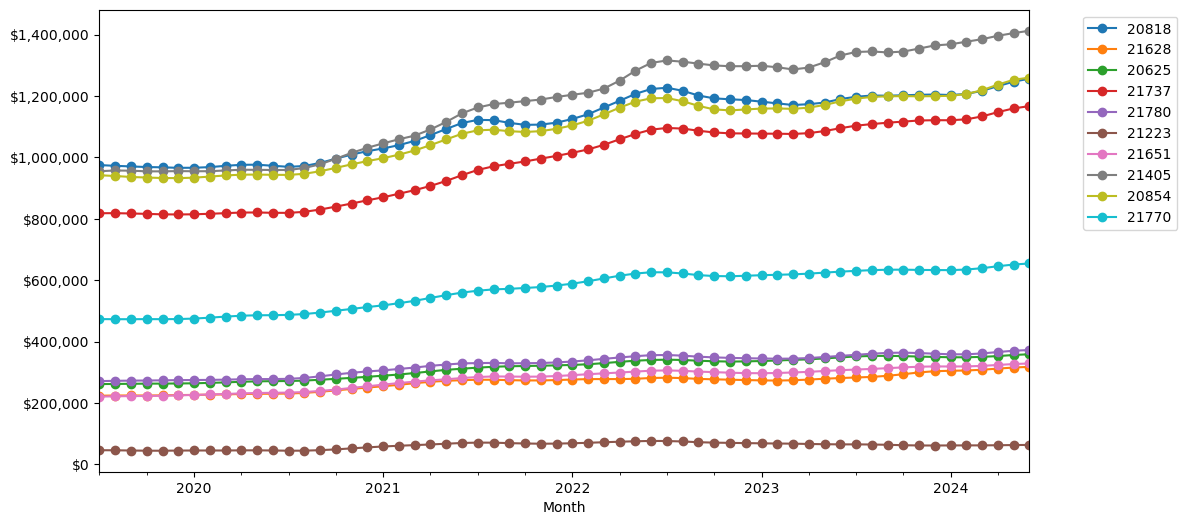

In [312]:
# Visualize Change in Value over last 5 years
ax = df_ts_top.loc[time_period:].plot(legend=False, figsize=(12, 6), style='-o')
ax.legend(bbox_to_anchor=(1.05, 1))

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

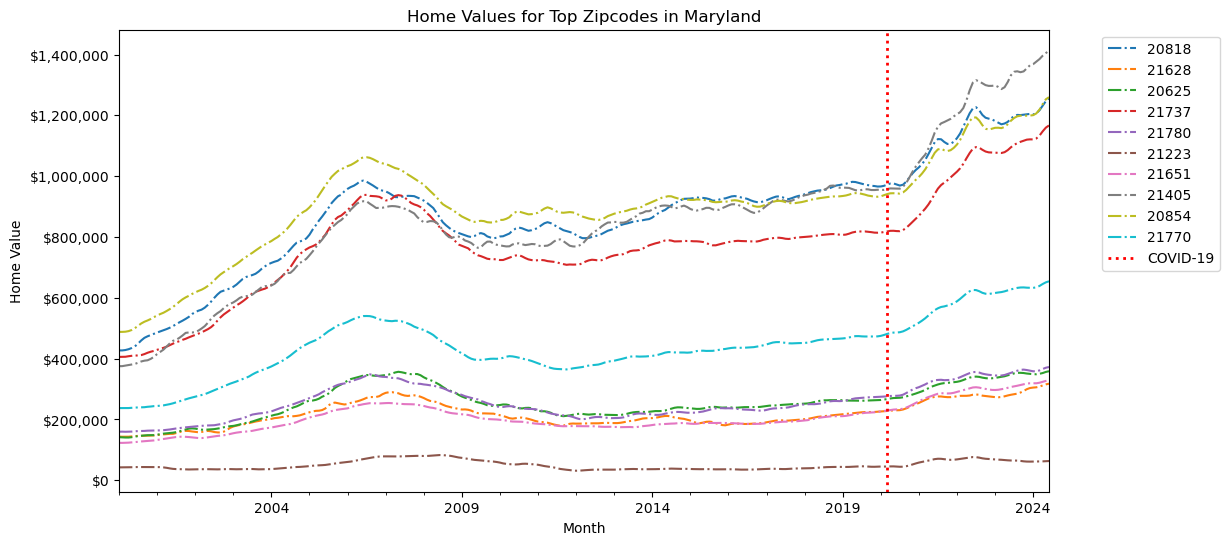

In [313]:
# Visualize HomeValues for selected zipcodes
ax = df_ts_top.plot(legend=False, figsize=(12, 6), style='-.')

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Annotate start of covid
ax.axvline(x='2020-03-01', color='r', linestyle=':', lw=2, label='COVID-19')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set(title='Home Values for Top Zipcodes in Maryland', ylabel='Home Value');


- We can clearly see that there awas a shift in the slope for increasing house prices sometime after the start of the COVID19 pandemic.

### Average Home Prices - First Half 2024

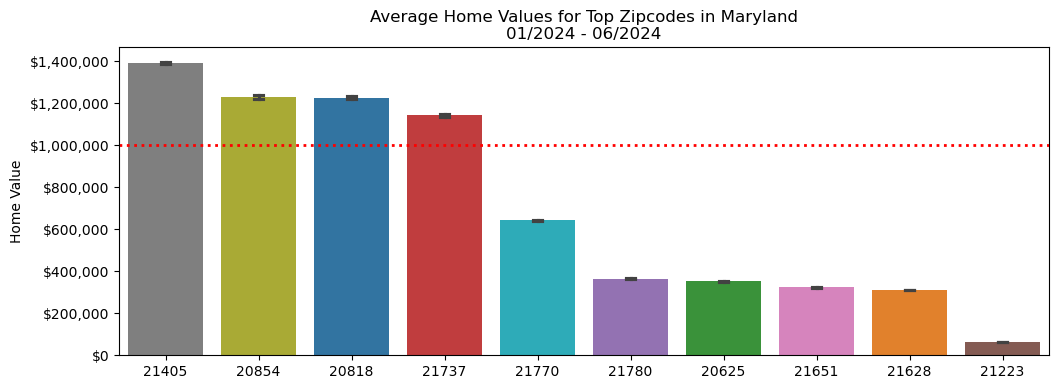

In [314]:
# Visualize HomeValues for selected zipcodes
plot_df = df_ts_top.loc['01-2024':'06-2024']
avg_home_values = plot_df.mean().sort_values(ascending=False)

ax = sns.barplot(data=plot_df, errorbar=('ci',68), capsize=0.1, order=avg_home_values.index)

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.set(title='Average Home Values for Top Zipcodes in Maryland\n01/2024 - 06/2024', ylabel='Home Value');
ax.axhline(y=1_000_000, color='r', linestyle=':', lw=2, label='Investment Cutoff')

### TO DO: Decide if Stakeholder wants to limit investment cost to < $1M

- If the stakeholder wants to keep investment costs below $1M, eliminate zipcodes with 2024 average > 1M

In [315]:
selected_zipcodes = avg_home_values[avg_home_values < 1_000_000]
selected_zipcodes

21770    642925.359861
21780    364521.669887
20625    352629.513395
21651    323038.798932
21628    310691.242889
21223     62341.853357
dtype: float64

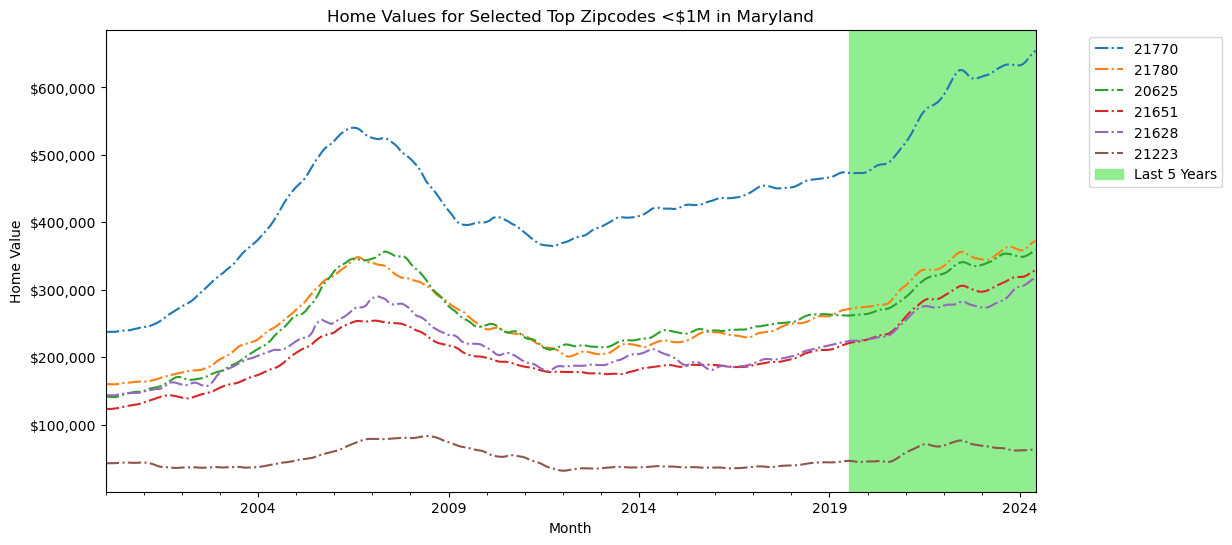

In [316]:
# Visualize Change in Value over last 5 years

ax = df_ts[selected_zipcodes.index].plot(legend=False, figsize=(12, 6), style='-.')

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))


## Fill Region from Last 5 Years
time_fmt = '%Y-%m-%d'
ylim = ax.get_ylim()
ax.fill_betweenx(ylim, x1= time_period.strftime(time_fmt), x2=last_date.strftime(time_fmt),
                 color='lightgreen', label='Last 5 Years')
ax.set_ylim(ylim)
ax.legend(bbox_to_anchor=(1.05, 1))

ax.set(title='Home Values for Selected Top Zipcodes <$1M in Maryland', ylabel='Home Value');


In [317]:
# time_period, last_date

## Time Series Modeling

In [318]:
zipcode_list = selected_zipcodes.index.tolist()
zipcode_list

['21770', '21780', '20625', '21651', '21628', '21223']

### ZipCode #1

In [319]:
import plotly.express as px

In [320]:
# Select current zipcode
zipcode = zipcode_list[0]
zipcode

'21770'

In [321]:
# Save zipcode
ts  = df_ts[zipcode].copy()
ts

Month
2000-01-31    237480.827063
2000-02-29    237465.535649
2000-03-31    237352.724156
2000-04-30    237599.199000
2000-05-31    238422.427999
                  ...      
2024-02-29    634752.320688
2024-03-31    639066.757896
2024-04-30    645540.609380
2024-05-31    650964.392366
2024-06-30    654502.832470
Name: 21770, Length: 294, dtype: float64

In [322]:
len(ts)

294

294 time lags is a lot to use...

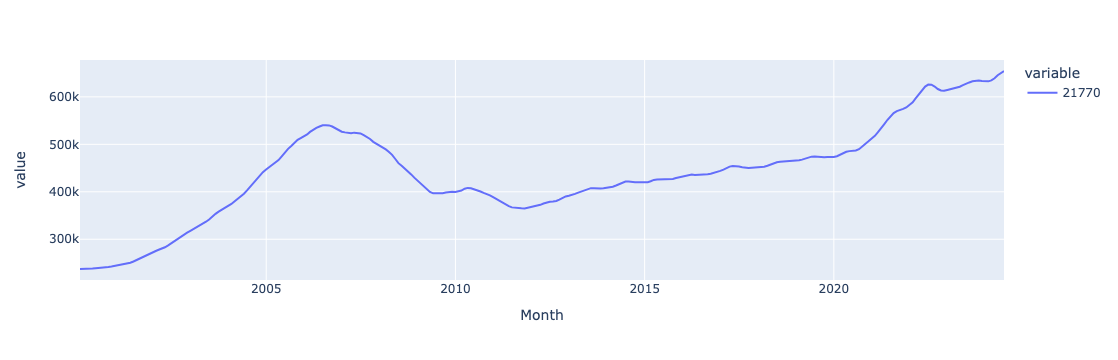

In [323]:
px.line(ts)

Based on trends in the data, will start from 2014 to present day.

In [324]:
plt.rcParams['figure.figsize'] = (12,4)

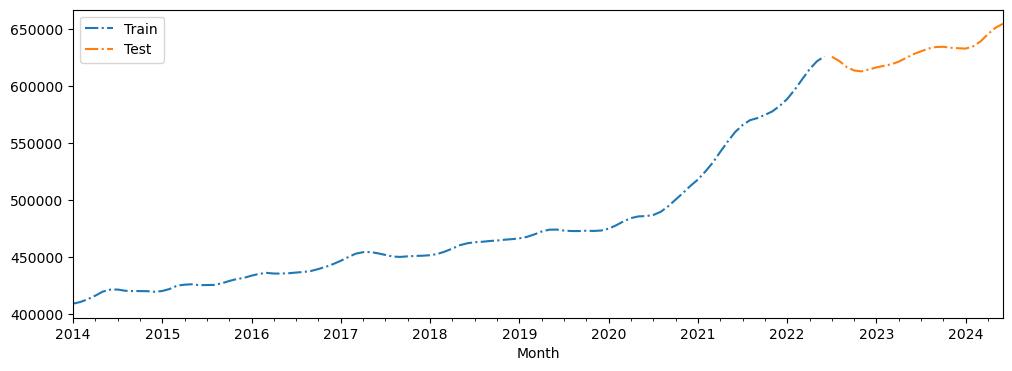

In [325]:
train, test = pm.model_selection.train_test_split(ts.loc['2014':], test_size=12*2)
ax = train.plot(label='Train', style='-.')
test.plot(ax=ax, label='Test', style='-.')
ax.legend();

In [326]:
# !pip install dojo_ds
import dojo_ds as ds
dir(ds.time_series)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'calc_thiels_U',
 'display_ts_workflow',
 'evaluate_ts_model',
 'get_adfuller_results',
 'get_sig_lags',
 'make_best_arima',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'np',
 'pd',
 'plot_acf',
 'plot_acf_pacf',
 'plot_forecast',
 'plot_pacf',
 'plt',
 'r2_score',
 'reference_interpreting_acf_pacf',
 'regression_metrics_ts',
 'sns',
 'thiels_U',
 'tsa']

In [327]:
# help(ds.time_series)

In [328]:
%load_ext autoreload
%autoreload 2

import ts_modeling_functions as fn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [329]:
# Check stationarity
fn.get_adfuller_results(train)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,1.094331,11,90,0.995168,0.05,False


In [330]:
d = pm.arima.ndiffs(train)
d

2

[Text(0.5, 1.0, 'Plotting Differenced Training vs Test Data')]

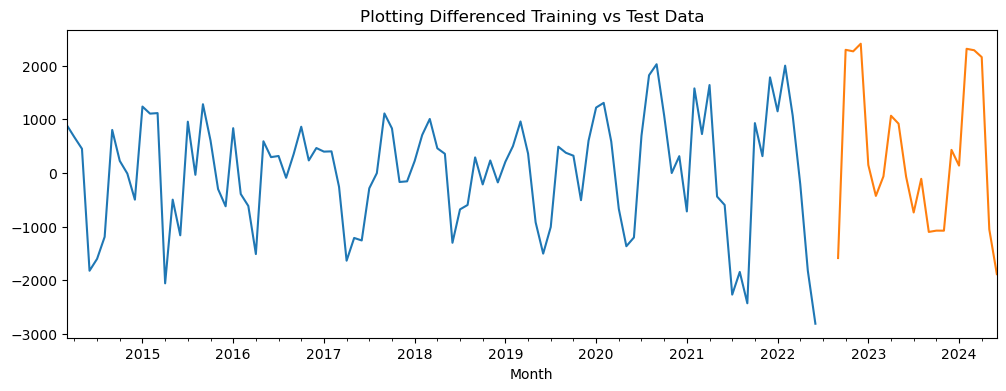

In [331]:
## Apply differencing for EDA
train_diff = pm.utils.diff(train, differences=d)
train_diff_ts = pd.Series(train_diff, index=train.iloc[d:].index, name=train.name)

test_diff =   pm.utils.diff(test, differences=d)
test_diff_ts = pd.Series(test_diff, index=test.iloc[d:].index, name=test.name)

# Plot the differenced data
ax = train_diff_ts.plot(label=f'Train - Differenced (d={d})')
test_diff_ts.plot(ax=ax, label='Test - Differenced(d={d})')
ax.set(title="Plotting Differenced Training vs Test Data")

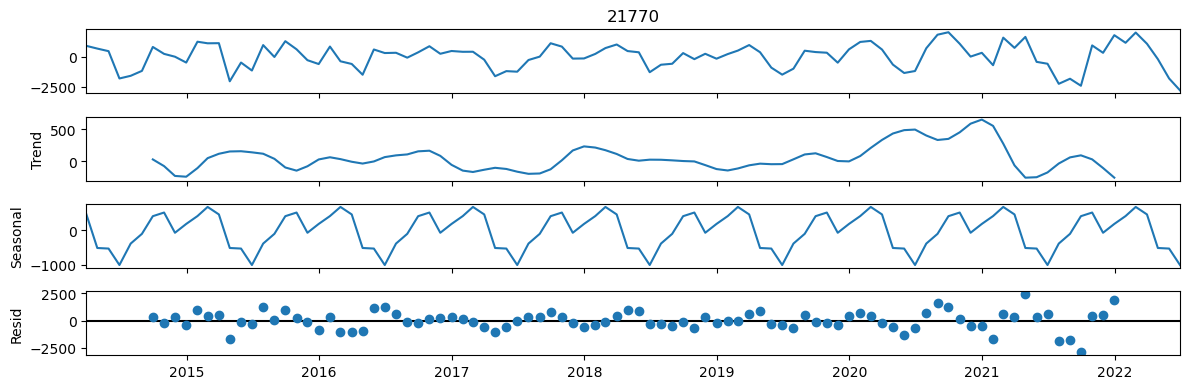

In [332]:
# Check for seasonality
decomp = tsa.seasonal_decompose(train_diff_ts)
decomp.plot();

- is $1k trend worth including a seasonal component? 
    - No.

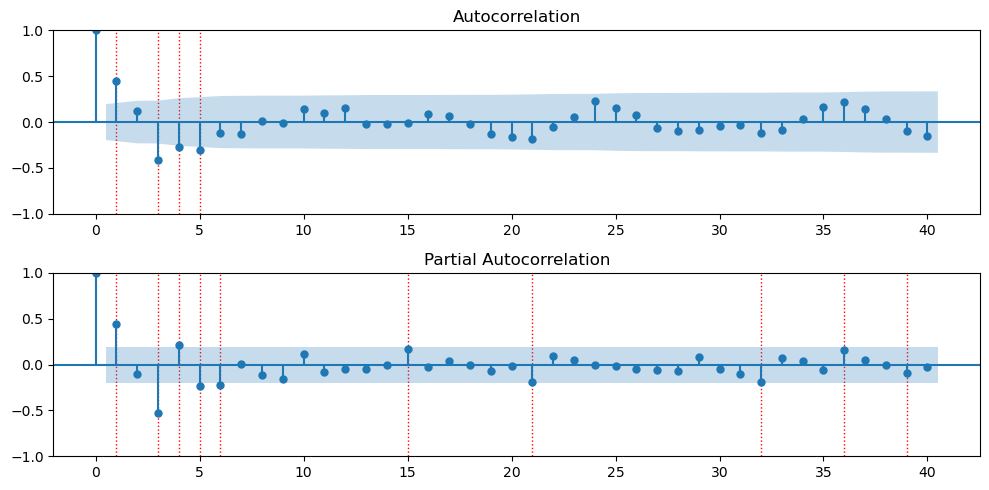

In [333]:
ds.time_series.plot_acf_pacf(train_diff_ts, annotate_sig=True);

In [334]:
ds.time_series.reference_interpreting_acf_pacf()

#### **Determining (S)ARIMA Orders from ACF/PACF**:

|                  | AR(p)                | MA(q)               | ARMA(p,q) |
|:----- | :---------------: | :---------------:|:---------------:|
| **ACF**              | Gradually decreases  | Dramatic drop after lag \(q\) | Gradually decreases |
| **PACF**             | Dramatic drop after lag \(p\) | Gradually decreases      | Gradually decreases  |
| **ARIMA Order (p,d,q)** | **(p,d,0)** | **(0,d,q)** | **Start with (1,d,1) & Iterate**|


___


#### **Determining Seasonal Orders** (only if seasonality is present):

| ***If seasonal*** | S-AR(P)                | S-MA(Q)                | SARIMA(P,Q)            |
|:-----------------| :---------------: | :---------------:|:---------------:|  
| **ACF** (seasonal lags)†         | Gradually decreases   | Dramatic drop after lag \(Q\)| Gradually decreases | 
| **PACF** (seasonal lags)†       |  Dramatic drop after lag \(P\) | Gradually decreases    | Gradually decreases |
| **Seasonal Order (P,D,Q)**  | **(P,D,0)**      | **(0,D,Q)**       | **Start with (1,D,1) & Iterate**  | 

- † seasonal lags = lags that are a multiple of the season length (m). E.g., If daily, m=7, check lags 7,14,21,etc.



#### TO DO: Add manual guess

In [335]:
p = 1
q = 1

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92418D+00    |proj g|=  8.95551D-02

At iterate    5    f=  7.92001D+00    |proj g|=  7.44506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   7.445D-05   7.920D+00
  F =   7.9200079812318087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21770   No. Observations:                  102
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -807.841
Date:                Thu, 18 Jul 2024   AIC                           1621.682
Time:                        16:53:39   BIC                           1629.437
Sample:                    01-31-2014   HQIC                          1624.818
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4552      0.183      2.488      0.013       0.097       0.814
ma.L1          0.0342      0.228      0.150      0.881      -0.412       0.481
sigma2      8.209e+05   1.17e+05      7.014      0.000    5.91e+05    1.05e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.80   Prob(JB):                         0.80
Heteroskedasticity (H):               1.44   Skew:                            -0.16
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

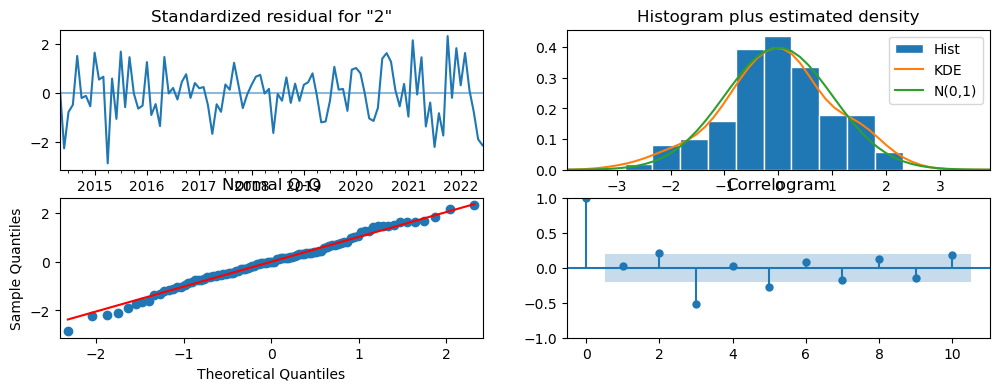

In [336]:
result = tsa.SARIMAX(train, order=(p,d,q), 
                     enforce_stationarity=False).fit()
display(result.summary())
result.plot_diagnostics();

In [337]:
# Get the forecast dataframe for test period
forecast_df = result.get_forecast(steps=len(test)).summary_frame()
forecast_df

21770,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-07-31,628771.627930,906.014245,626995.872639,630547.383220
2022-08-31,631059.251707,2430.596658,626295.369797,635823.133618
2022-09-30,633068.241167,4516.485109,624216.093016,641920.389318
2022-10-31,634950.386598,7078.085685,621077.593576,648823.179621
2022-11-30,636774.788218,10050.114892,617076.924990,656472.651447
2022-12-31,638572.902848,13383.936389,612340.869553,664804.936142
2023-01-31,640359.050726,17043.015448,606955.354260,673762.747192
2023-02-28,642139.750922,20999.335945,600981.808770,683297.693074
2023-03-31,643917.971145,25230.871862,594466.370996,693369.571294
2023-04-30,645695.062397,29719.866216,587445.194989,703944.929805


In [338]:

def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    # Convert y-axis to currency
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))


    return fig, ax


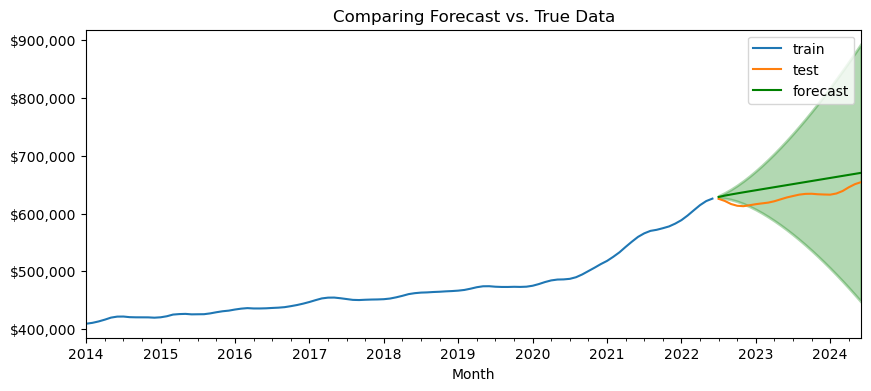

In [339]:
# # Plot training data, test data, plus forecast with CI
fig, ax = plot_forecast(train, test,forecast_df)
# Format price values as currency


### pmdarima AutoArima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5599.198, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5604.420, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5587.442, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5644.716, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5588.839, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5589.050, Time=0.24 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=5587.681, Time=0.37 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=5587.240, Time=0.04 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=5587.564, Time=0.24 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=5589.564, Time=0.29 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5597.705, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5544.575, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5542.375, Time=0.15 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5544.996, Time=0.35 sec
 ARIMA(1,1,1)(1,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  294
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2767.187
Date:                Thu, 18 Jul 2024   AIC                           5542.375
Time:                        16:53:43   BIC                           5557.096
Sample:                    01-31-2000   HQIC                          5548.271
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     43.4036     28.517      1.522      0.128     -12.488      99.295
ar.L1          0.9505      0.018     51.648      0.000       0.914       0.987
ma.L1         -0.9236      0.021    -44.401      0.000      -0.964      -0.883
sigma2      9.148e+06      0.000   7.75e+10      0.000    9.15e+06    9.15e+06
===================================================================================
Ljung-Box (L1) (Q):                 251.72   Jarque-Bera (JB):                 6.26
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.66   Skew:                            -0.35
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.83e+27. Standard errors may be unstable.
"""

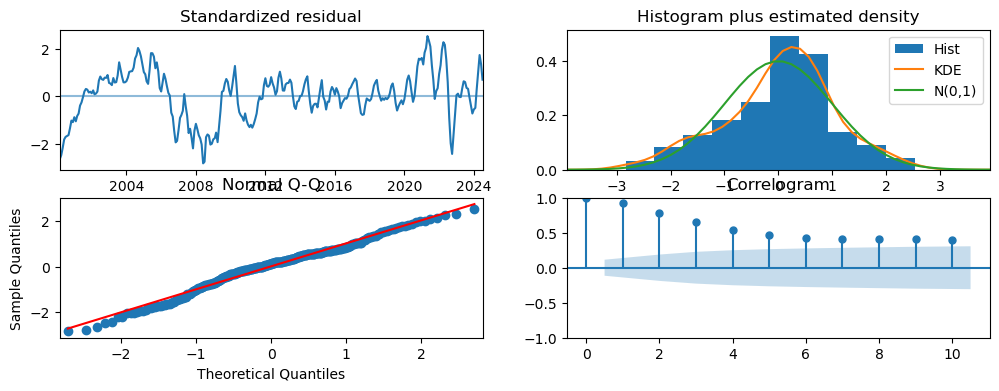

In [340]:
import pmdarima as pm

# fit stepwise auto-ARIMA

auto_arima_kws = dict(start_p=0, start_q=0,
                             max_p=5, max_q=5, 
                             seasonal=True,
                             start_P=0, start_Q=0,
                             max_P=5, max_Q=5,
                             m=12,
                            #  d=d, D=1,
                             trace=True, 
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)
stepwise_fit = pm.auto_arima(ts, **auto_arima_kws )  # 
display(stepwise_fit.summary())
stepwise_fit.plot_diagnostics();

In [341]:
stepwise_fit.order, stepwise_fit.seasonal_order

((1, 1, 1), (0, 0, 0, 12))

In [342]:
best_model = tsa.SARIMAX(train, order=stepwise_fit.order, 
                         seasonal_order=stepwise_fit.seasonal_order,
                         trend='c').fit()
display(best_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66644D+02    |proj g|=  6.50898D+01

At iterate    5    f=  1.26791D+01    |proj g|=  4.87898D+00

At iterate   10    f=  1.16021D+01    |proj g|=  6.31199D-01

At iterate   15    f=  1.15572D+01    |proj g|=  2.08562D-02

At iterate   20    f=  1.15057D+01    |proj g|=  5.80121D-01

At iterate   25    f=  1.09689D+01    |proj g|=  3.07991D-01

At iterate   30    f=  1.05339D+01    |proj g|=  1.03203D-01
  ys=-1.169E+00  -gs= 1.682E-01 BFGS update SKIPPED

At iterate   35    f=  9.26262D+00    |proj g|=  3.90167D-01

At iterate   40    f=  9.18736D+00    |proj g|=  9.05323D-02

At iterate   45    f=  9.18634D+00    |proj g|=  1.17751D-04

At iterate   50    f=  9.18633D+00    |proj g|=  2.28699D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.
/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21770   No. Observations:                  102
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -937.006
Date:                Thu, 18 Jul 2024   AIC                           1882.012
Time:                        16:53:44   BIC                           1892.473
Sample:                    01-31-2014   HQIC                          1886.247
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    298.2430   2894.573      0.103      0.918   -5375.015    5971.501
ar.L1          0.8581      1.377      0.623      0.533      -1.841       3.557
ma.L1         -0.8569      1.387     -0.618      0.537      -3.575       1.861
sigma2      6.714e+06      2.345   2.86e+06      0.000    6.71e+06    6.71e+06
===================================================================================
Ljung-Box (L1) (Q):                  87.46   Jarque-Bera (JB):                26.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.27   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.07e+22. Standard errors may be unstable.
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 23,702.402
- MSE = 607,849,615.225
- RMSE = 24,654.606
- R^2 = -3.761
- MAPE = 3.77%
- Thiel's U = 8.384


/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



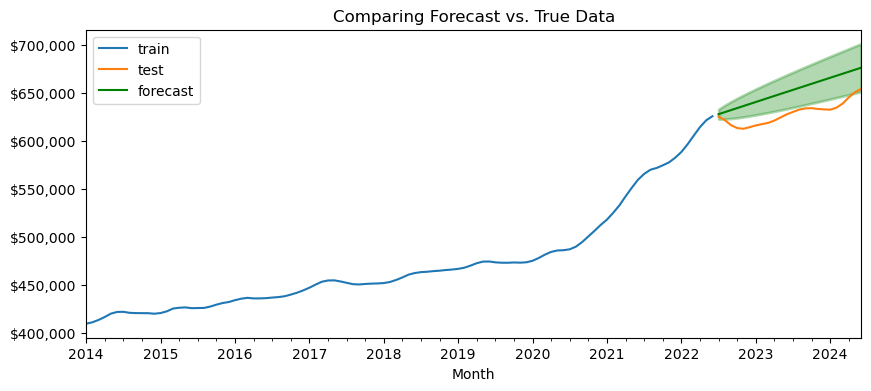

In [343]:
# Get the forecast dataframe for test period
forecast_df = best_model.get_forecast(steps=len(test)).summary_frame()
plot_forecast(train, test, forecast_df);
fn.regression_metrics_ts(ts_true=test, ts_pred=forecast_df['mean'])

#### Final Model 
- Fit on entire dataset

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12946D+01    |proj g|=  5.13677D+00

At iterate    5    f=  1.24770D+01    |proj g|=  2.12558D+00

At iterate   10    f=  1.20004D+01    |proj g|=  4.58299D-02

At iterate   15    f=  1.20002D+01    |proj g|=  3.12192D-02

At iterate   20    f=  1.19934D+01    |proj g|=  4.06541D-01

At iterate   25    f=  1.16725D+01    |proj g|=  1.84396D+00

At iterate   30    f=  1.00636D+01    |proj g|=  1.72662D-01

At iterate   35    f=  9.64560D+00    |proj g|=  5.03879D-03
  ys=-1.572E-02  -gs= 4.752E-02 BFGS update SKIPPED

At iterate   40    f=  9.42262D+00    |proj g|=  3.12762D-02

At iterate   45    f=  9.41220D+00    |proj g|=  9.64536D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21770   No. Observations:                  294
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2767.187
Date:                Thu, 18 Jul 2024   AIC                           5542.375
Time:                        16:53:44   BIC                           5557.096
Sample:                    01-31-2000   HQIC                          5548.271
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     43.4036     28.517      1.522      0.128     -12.488      99.295
ar.L1          0.9505      0.018     51.648      0.000       0.914       0.987
ma.L1         -0.9236      0.021    -44.401      0.000      -0.964      -0.883
sigma2      9.148e+06      0.000   7.75e+10      0.000    9.15e+06    9.15e+06
===================================================================================
Ljung-Box (L1) (Q):                 251.72   Jarque-Bera (JB):                 6.26
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.66   Skew:                            -0.35
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.83e+27. Standard errors may be unstable.
"""

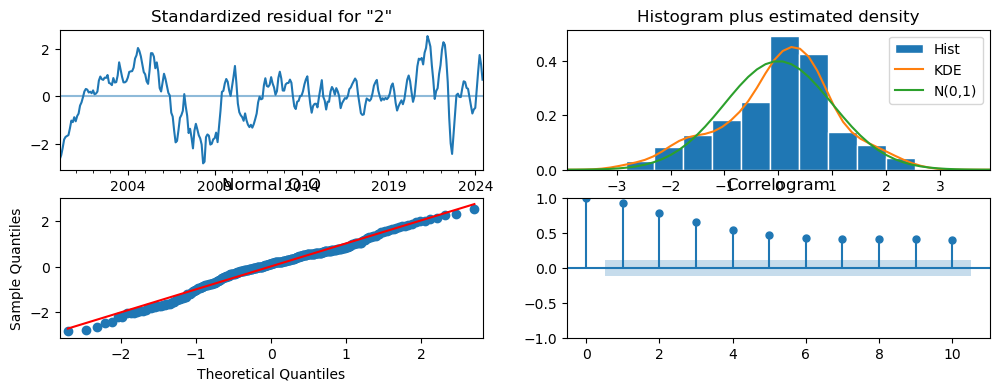

In [344]:
final_model = tsa.SARIMAX(ts, order=stepwise_fit.order, 
                         seasonal_order=stepwise_fit.seasonal_order,
                         trend='c').fit()
display(final_model.summary())
final_model.plot_diagnostics();

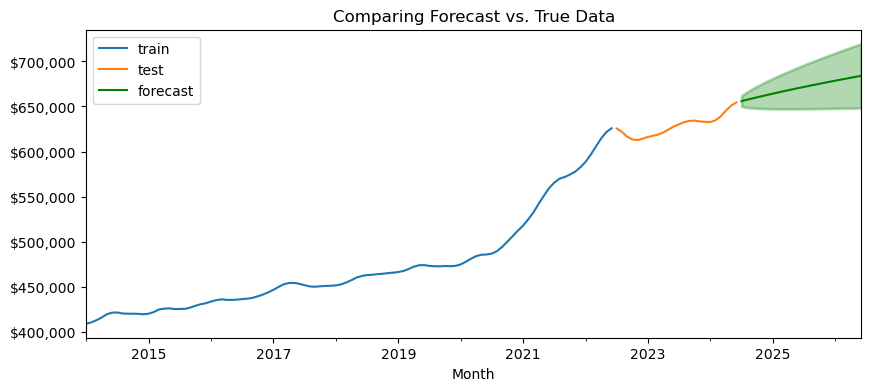

In [345]:

# Get the forecast dataframe for test period
forecast_df = final_model.get_forecast(steps=len(test)).summary_frame()
plot_forecast(train, test, forecast_df);
# fn.regression_metrics_ts(ts_true=test, ts_pred=forecast_df['mean'])

In [346]:
'intercept' in final_model.params

True

In [347]:
ZIP_RESULTS = {}
# ZIP_RESULTS[zipcode] = dict(model=final_model, forecast = forecast_df)

## Automating Forecasting for Selected Zipcodes

In [348]:
'intercept' in stepwise_fit.params()

True

- Processing Zipcode: 21770 (0 of 6)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.19646D+00    |proj g|=  1.91486D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   4.034D-07   8.196D+00
  F =   8.1963600834151791     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21770   No. Observations:                  102
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -836.029
Date:                Thu, 18 Jul 2024   AIC                           1674.057
Time:                        16:53:45   BIC                           1676.663
Sample:                    01-31-2014   HQIC                          1675.112
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.069e+06   1.62e+05      6.599      0.000    7.52e+05    1.39e+06
===================================================================================
Ljung-Box (L1) (Q):                  20.49   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.00   Prob(JB):                         0.12
Heteroskedasticity (H):               2.16   Skew:                            -0.49
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

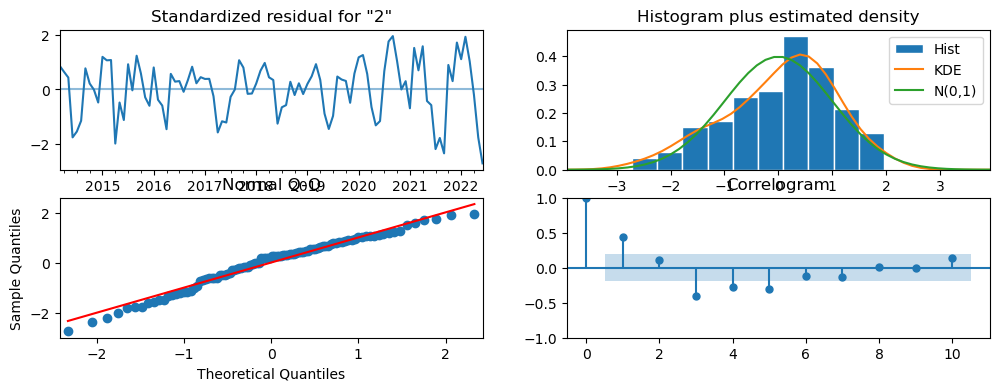

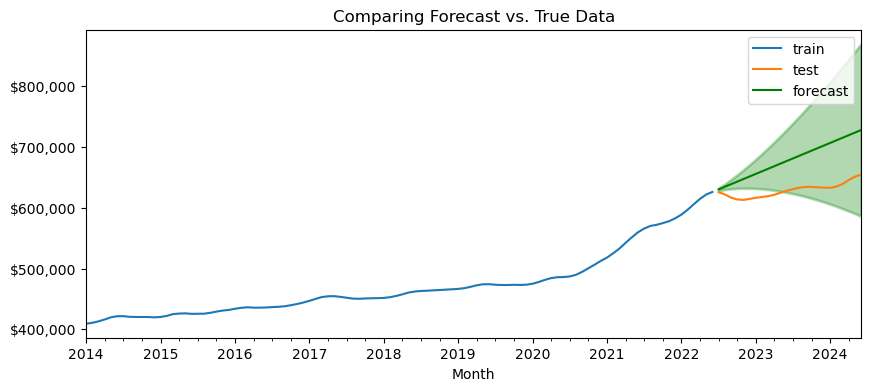

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 50,307.137
- MSE = 2,928,118,003.433
- RMSE = 54,112.087
- R^2 = -21.935
- MAPE = 7.96%
- Thiel's U = 18.287
------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 50,307.137
- MSE = 2,928,118,003.433
- RMSE = 54,112.087
- R^2 = -21.935
- MAPE = 7.96%
- Thiel's U = 18.287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39002D+00    |proj g|=  1.31188D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final general

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21770   No. Observations:                  126
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1057.134
Date:                Thu, 18 Jul 2024   AIC                           2116.269
Time:                        16:53:45   BIC                           2119.089
Sample:                    01-31-2014   HQIC                          2117.414
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.487e+06   1.56e+05      9.506      0.000    1.18e+06    1.79e+06
===================================================================================
Ljung-Box (L1) (Q):                  38.95   Jarque-Bera (JB):                11.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Processing Zipcode: 21780 (1 of 6)
RUNNING THE L-BFGS-B CODE

           * * *



/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21780   No. Observations:                  102
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -897.031
Date:                Thu, 18 Jul 2024   AIC                           1798.061
Time:                        16:53:46   BIC                           1803.291
Sample:                    01-31-2014   HQIC                          1800.178
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1377.1501    198.551      6.936      0.000     987.998    1766.302
sigma2      3.033e+06      5e+05      6.067      0.000    2.05e+06    4.01e+06
===================================================================================
Ljung-Box (L1) (Q):                  74.84   Jarque-Bera (JB):                 7.71
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.89   Skew:                             0.68
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79442D+00    |proj g|=  3.55271D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.553D-10   8.794D+00
  F =   8.7944170350105093     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


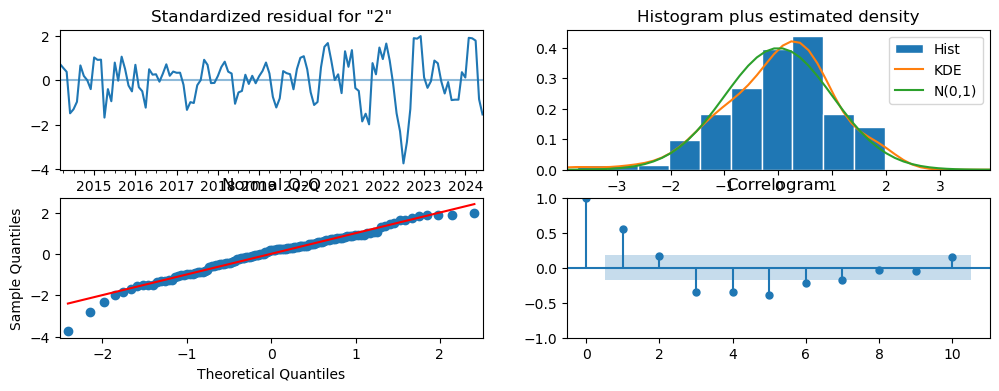

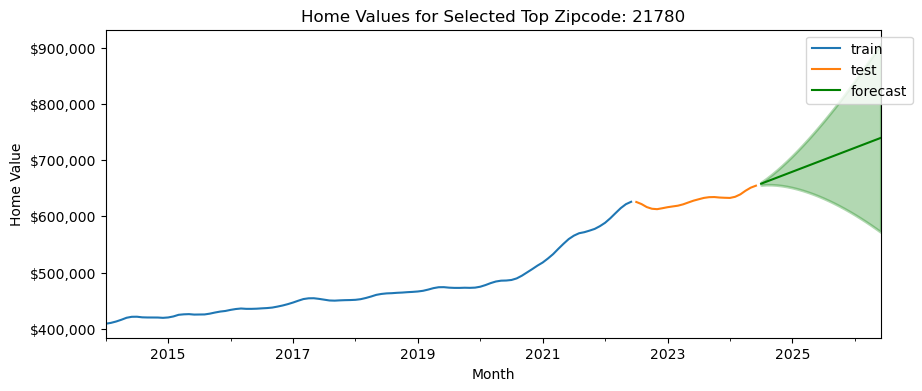

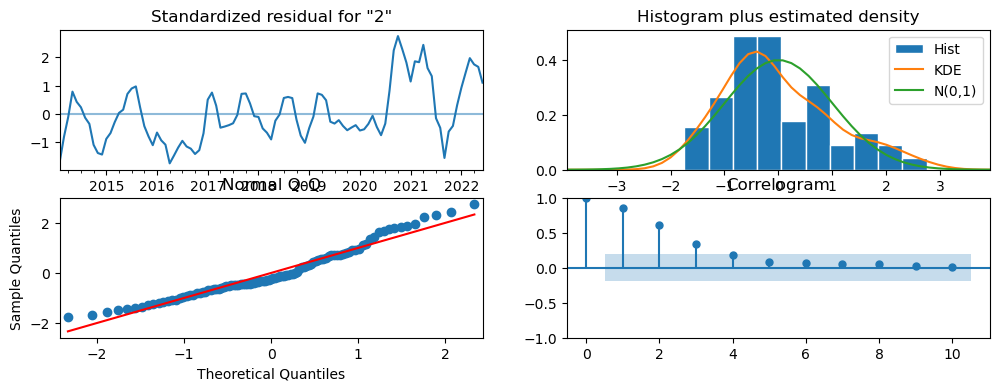

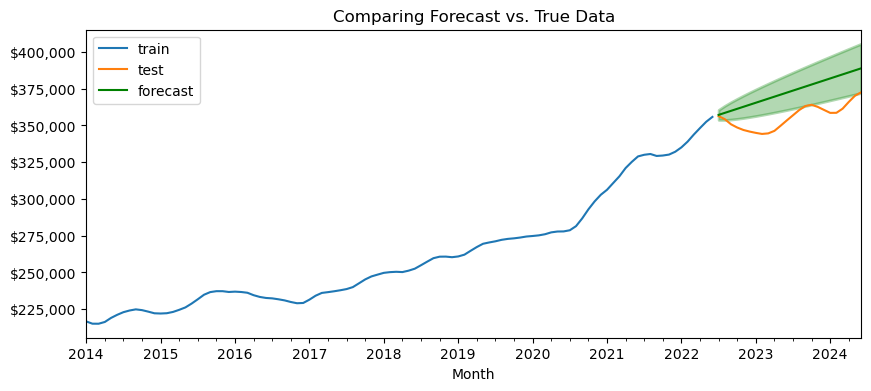

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 17,138.287
- MSE = 328,829,767.129
- RMSE = 18,133.664
- R^2 = -3.864
- MAPE = 4.82%
- Thiel's U = 7.295
------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 17,138.287
- MSE = 328,829,767.129
- RMSE = 18,133.664
- R^2 = -3.864
- MAPE = 4.82%
- Thiel's U = 7.295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90097D+00    |proj g|=  3.55271D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cau

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21780   No. Observations:                  126
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1121.522
Date:                Thu, 18 Jul 2024   AIC                           2247.043
Time:                        16:53:46   BIC                           2252.700
Sample:                    01-31-2014   HQIC                          2249.341
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1246.7619    175.729      7.095      0.000     902.340    1591.184
sigma2      3.636e+06   5.16e+05      7.047      0.000    2.62e+06    4.65e+06
===================================================================================
Ljung-Box (L1) (Q):                  90.83   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.00   Prob(JB):                         0.28
Heteroskedasticity (H):               2.79   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Processing Zipcode: 20625 (2 of 6)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.63077D+00    |proj g|=  3.55271D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.553D-10   8.631D+00
  F =   8.6307710626960930     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  20625   No. Observations:                  102
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -880.339
Date:                Thu, 18 Jul 2024   AIC                           1764.677
Time:                        16:53:47   BIC                           1769.908
Sample:                    01-31-2014   HQIC                          1766.795
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1124.1492    175.772      6.395      0.000     779.642    1468.657
sigma2      2.179e+06   3.61e+05      6.038      0.000    1.47e+06    2.89e+06
===================================================================================
Ljung-Box (L1) (Q):                  79.51   Jarque-Bera (JB):                10.51
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.81   Skew:                             0.79
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

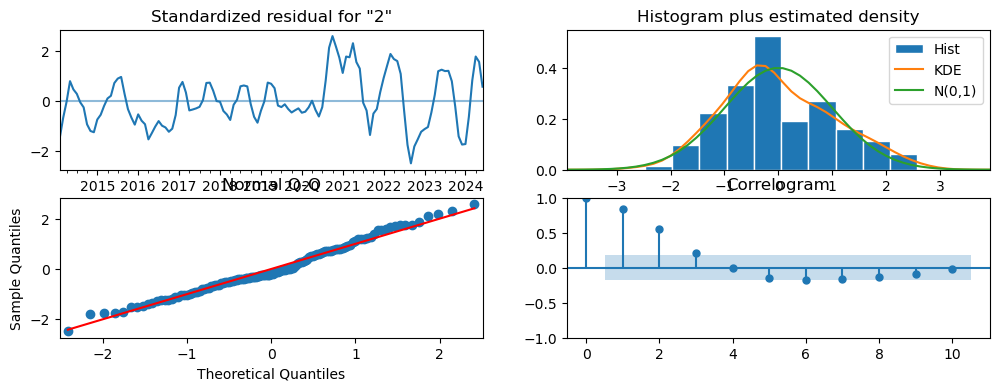

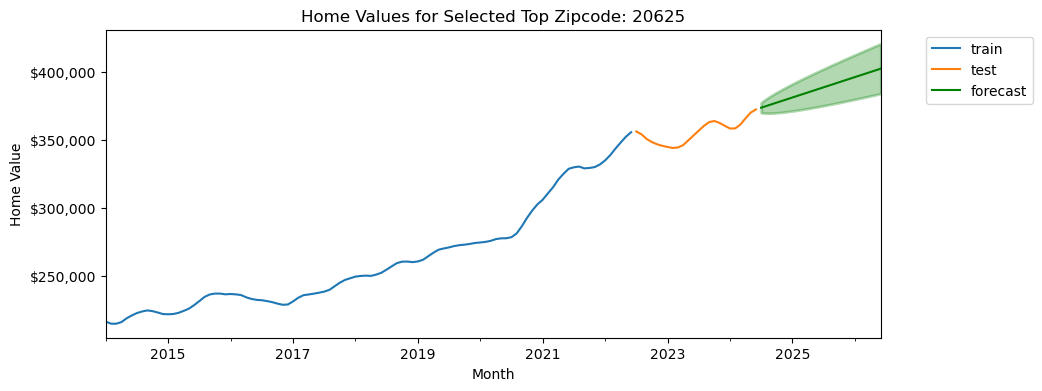

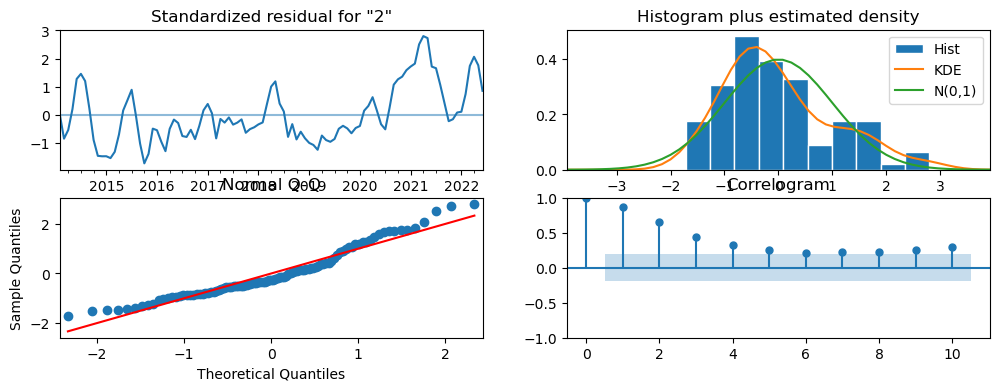

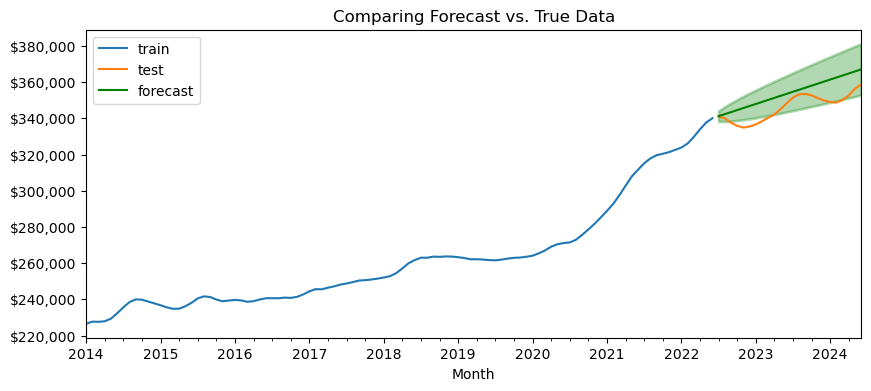

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 8,126.210
- MSE = 80,168,053.545
- RMSE = 8,953.661
- R^2 = -0.550
- MAPE = 2.35%
- Thiel's U = 4.696
------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 8,126.210
- MSE = 80,168,053.545
- RMSE = 8,953.661
- R^2 = -0.550
- MAPE = 2.35%
- Thiel's U = 4.696
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68995D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy po

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  20625   No. Observations:                  126
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1094.934
Date:                Thu, 18 Jul 2024   AIC                           2193.868
Time:                        16:53:48   BIC                           2199.525
Sample:                    01-31-2014   HQIC                          2196.166
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1057.4249    147.625      7.163      0.000     768.086    1346.764
sigma2      2.376e+06   3.35e+05      7.096      0.000    1.72e+06    3.03e+06
===================================================================================
Ljung-Box (L1) (Q):                  94.72   Jarque-Bera (JB):                 5.04
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               2.75   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Processing Zipcode: 21651 (3 of 6)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06866D+01    |proj g|=  9.54428D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   3.975D-04   7.627D+00
  F =   7.6271701536275875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21651   No. Observations:                  102
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -777.971
Date:                Thu, 18 Jul 2024   AIC                           1559.943
Time:                        16:53:49   BIC                           1565.153
Sample:                    01-31-2014   HQIC                          1562.051
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0390      0.018      2.134      0.033       0.003       0.075
sigma2      2.636e+05   2.29e+04     11.535      0.000    2.19e+05    3.08e+05
===================================================================================
Ljung-Box (L1) (Q):                  19.24   Jarque-Bera (JB):                16.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.05   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

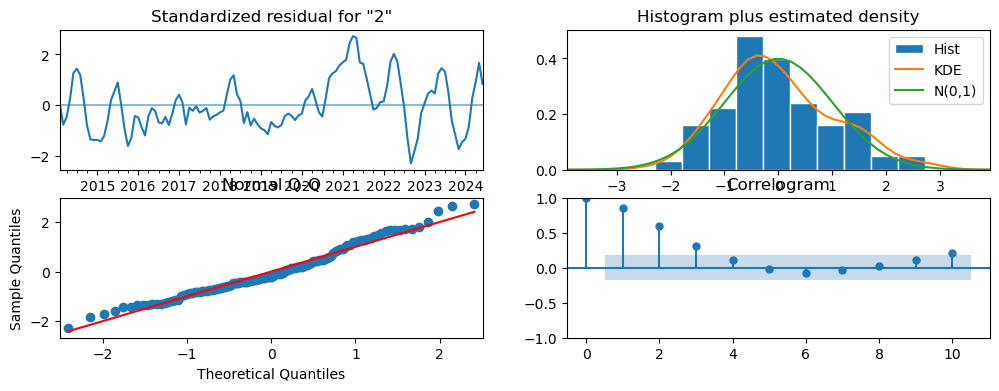

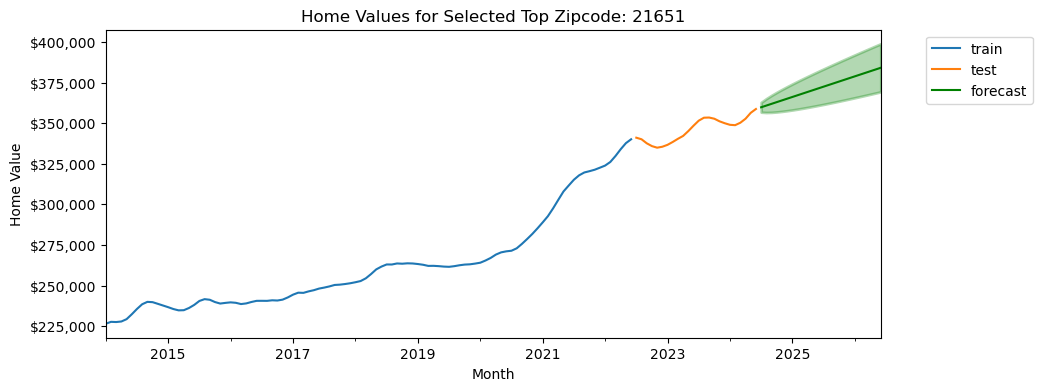

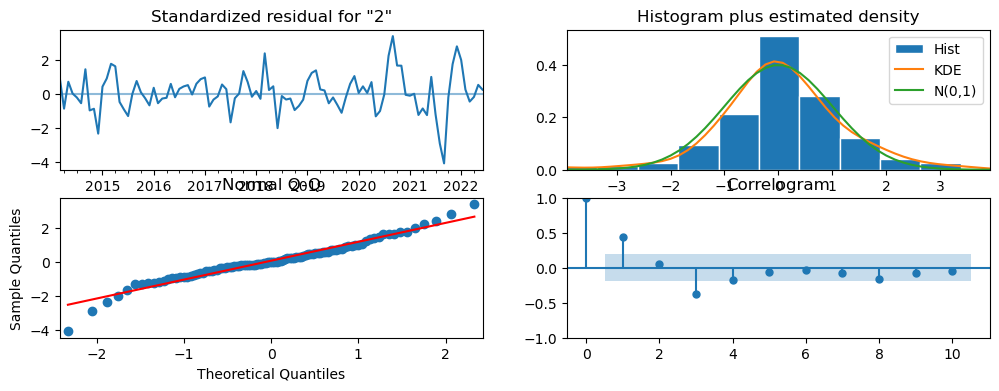

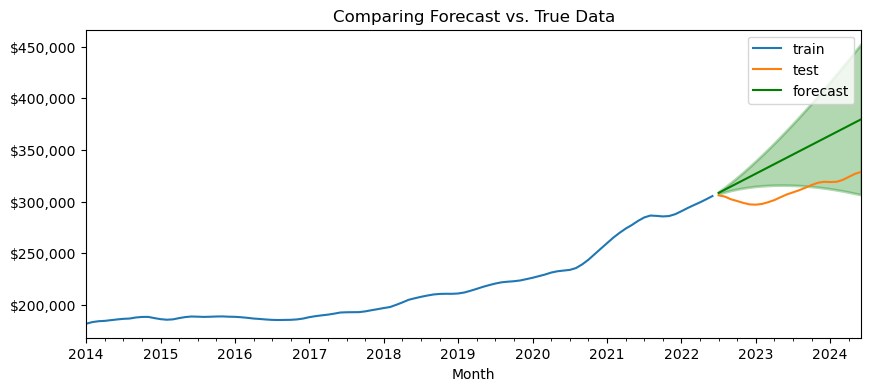

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 33,990.844
- MSE = 1,331,228,069.395
- RMSE = 36,485.998
- R^2 = -12.631
- MAPE = 10.88%
- Thiel's U = 18.625
------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 33,990.844
- MSE = 1,331,228,069.395
- RMSE = 36,485.998
- R^2 = -12.631
- MAPE = 10.88%
- Thiel's U = 18.625
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07506D+01    |proj g|=  7.90885D+00

At iterate    5    f=  7.83052D+00    |proj g|=  8.40158D-04

At iterate   10    f=  7.83047D+00    |proj g|=  5.22071D-02

At iterate   15    f=  7.82609D+00    |proj g|=  4.44583D-01

At iterate   20    f=  7.81731D+00    |proj g|=  8.39826D-04



/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21651   No. Observations:                  126
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -984.982
Date:                Thu, 18 Jul 2024   AIC                           1973.963
Time:                        16:53:49   BIC                           1979.604
Sample:                    01-31-2014   HQIC                          1976.255
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0299      0.017      1.777      0.076      -0.003       0.063
sigma2      4.564e+05   4.48e+04     10.191      0.000    3.69e+05    5.44e+05
===================================================================================
Ljung-Box (L1) (Q):                  26.73   Jarque-Bera (JB):                16.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Processing Zipcode: 21628 (4 of 6)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.14352D+00    |proj g|=  2.02110D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   4.334D-07   8.143D+00
  F =   8.1434265880653474     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21628   No. Observations:                  102
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -830.630
Date:                Thu, 18 Jul 2024   AIC                           1663.259
Time:                        16:53:50   BIC                           1665.864
Sample:                    01-31-2014   HQIC                          1664.313
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.596e+05   1.11e+05      8.618      0.000    7.41e+05    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                  25.05   Jarque-Bera (JB):                 4.41
Prob(Q):                              0.00   Prob(JB):                         0.11
Heteroskedasticity (H):               0.39   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

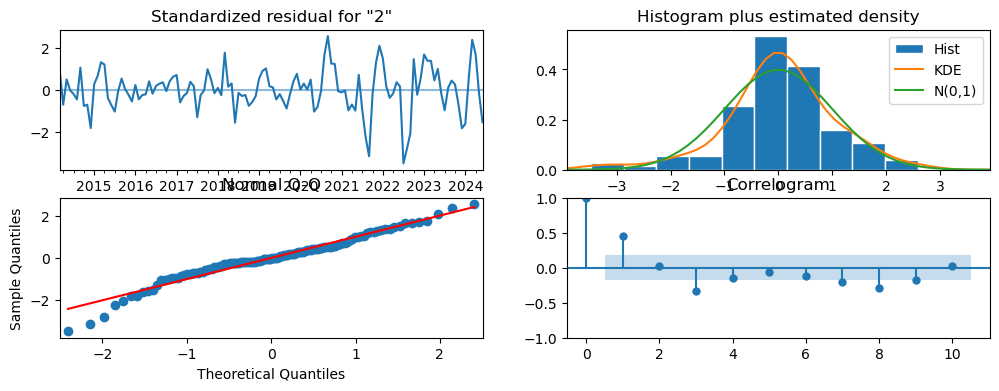

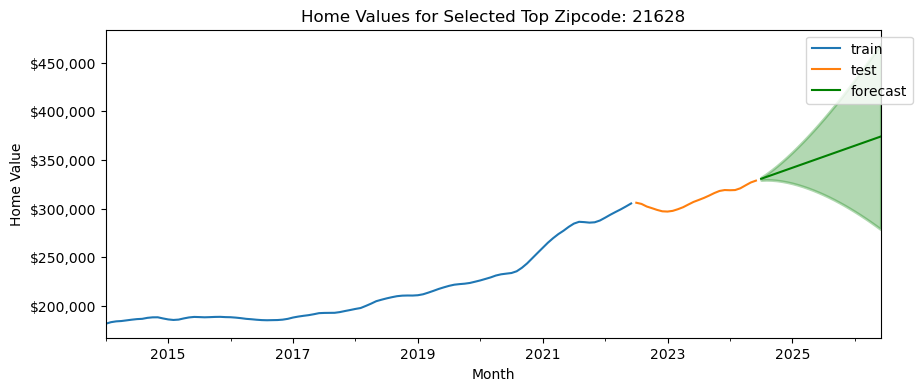

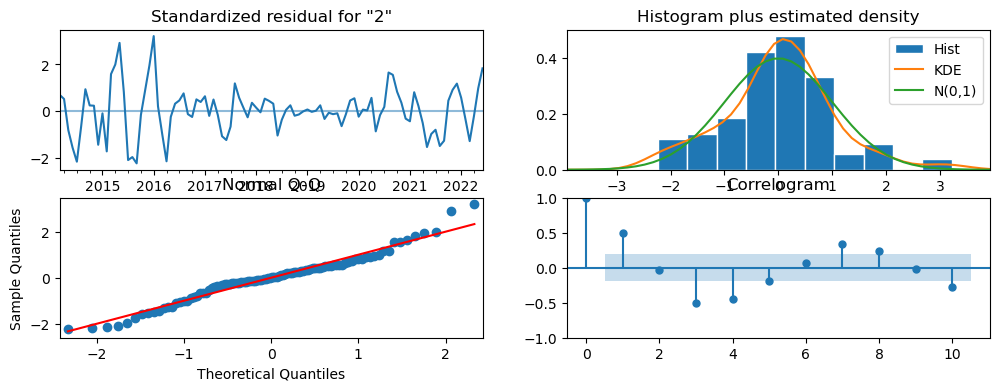

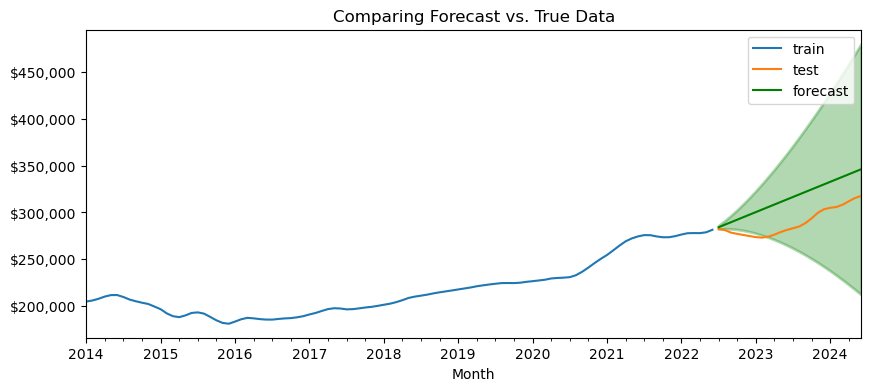

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 25,890.031
- MSE = 746,068,008.966
- RMSE = 27,314.246
- R^2 = -2.486
- MAPE = 8.94%
- Thiel's U = 10.435
------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 25,890.031
- MSE = 746,068,008.966
- RMSE = 27,314.246
- R^2 = -2.486
- MAPE = 8.94%
- Thiel's U = 10.435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23518D+00    |proj g|=  1.53543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21628   No. Observations:                  126
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1037.624
Date:                Thu, 18 Jul 2024   AIC                           2077.248
Time:                        16:53:50   BIC                           2080.068
Sample:                    01-31-2014   HQIC                          2078.394
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.086e+06   1.28e+05      8.508      0.000    8.36e+05    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                  26.73   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.00   Prob(JB):                         0.75
Heteroskedasticity (H):               0.83   Skew:                            -0.01
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Processing Zipcode: 21223 (5 of 6)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35395D+00    |proj g|=  1.36659D+00

At iterate    5    f=  7.99622D+00    |proj g|=  4.85116D-04

At iterate   10    f=  7.99622D+00    |proj g|=  4.73609D-03

At iterate   15    f=  7.99577D+00    |proj g|=  6.09078D-02

At iterate   20    f=  7.97477D+00    |proj g|=  1.73896D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   5.705D-05   7.970D+00
  F

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21223   No. Observations:                  102
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -812.946
Date:                Thu, 18 Jul 2024   AIC                           1631.891
Time:                        16:53:51   BIC                           1639.737
Sample:                    01-31-2014   HQIC                          1635.067
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    173.6403     54.031      3.214      0.001      67.741     279.540
ar.L1          0.4584      0.015     31.306      0.000       0.430       0.487
sigma2      2.445e+05    2.5e+04      9.781      0.000    1.96e+05    2.94e+05
===================================================================================
Ljung-Box (L1) (Q):                  34.27   Jarque-Bera (JB):               284.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                            -0.95
Prob(H) (two-sided):                  0.13   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

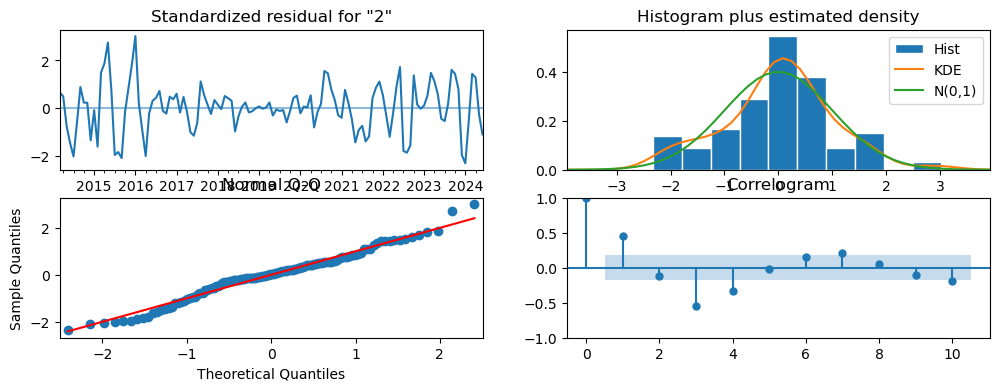

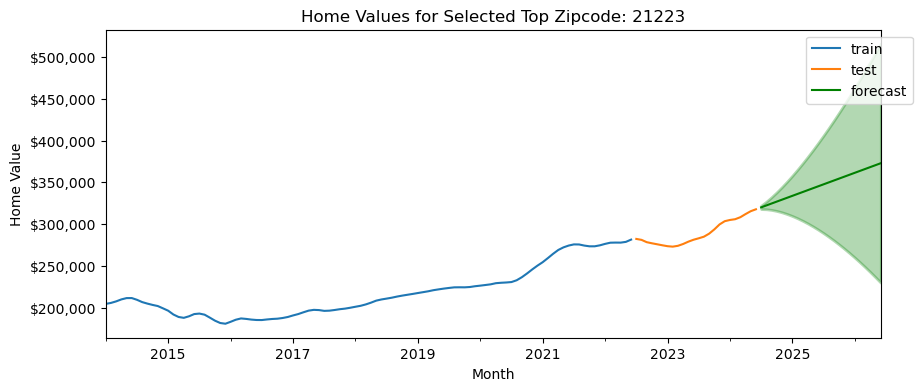

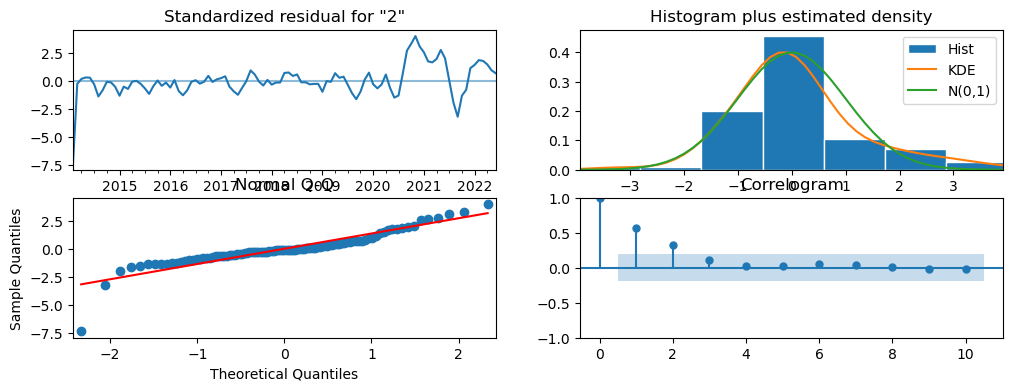

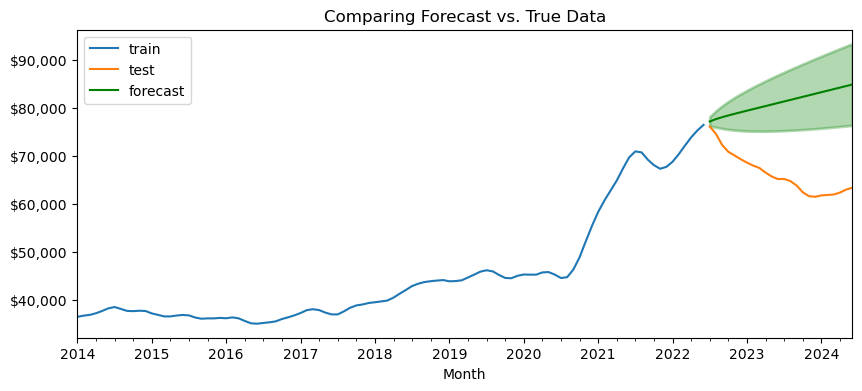

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 14,983.060
- MSE = 264,695,931.475
- RMSE = 16,269.479
- R^2 = -14.128
- MAPE = 23.32%
- Thiel's U = 20.357
------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 14,983.060
- MSE = 264,695,931.475
- RMSE = 16,269.479
- R^2 = -14.128
- MAPE = 23.32%
- Thiel's U = 20.357
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01795D+00    |proj g|=  1.11960D+00

At iterate    5    f=  7.98098D+00    |proj g|=  1.92390D-04

At iterate   10    f=  7.98097D+00    |proj g|=  6.69878D-03

At iterate   15    f=  7.98012D+00    |proj g|=  7.22468D-02

At iterate   20    f=  7.97579D+00    |proj g|=  1.85555D-04

    

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/codingdojo/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/ts-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21223   No. Observations:                  126
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1004.949
Date:                Thu, 18 Jul 2024   AIC                           2015.899
Time:                        16:53:51   BIC                           2024.384
Sample:                    01-31-2014   HQIC                          2019.346
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     50.1837     44.788      1.120      0.263     -37.599     137.967
ar.L1          0.5032      0.014     34.734      0.000       0.475       0.532
sigma2      2.525e+05    2.3e+04     10.998      0.000    2.08e+05    2.98e+05
===================================================================================
Ljung-Box (L1) (Q):                  37.87   Jarque-Bera (JB):               521.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -1.36
Prob(H) (two-sided):                  0.45   Kurtosis:                        12.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

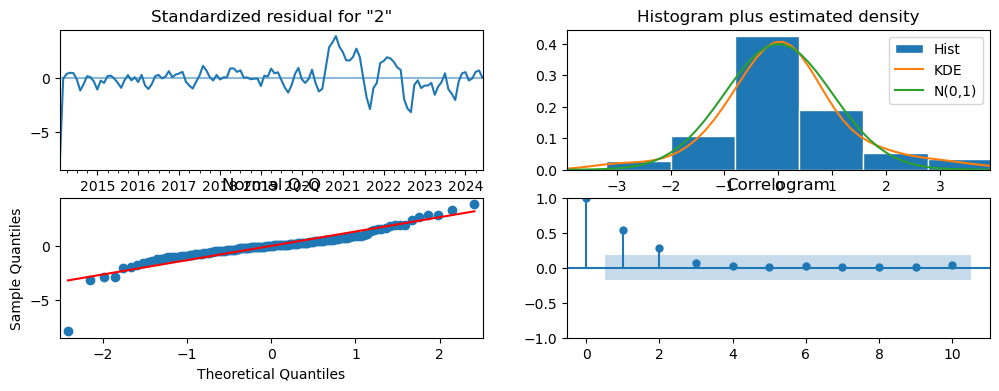

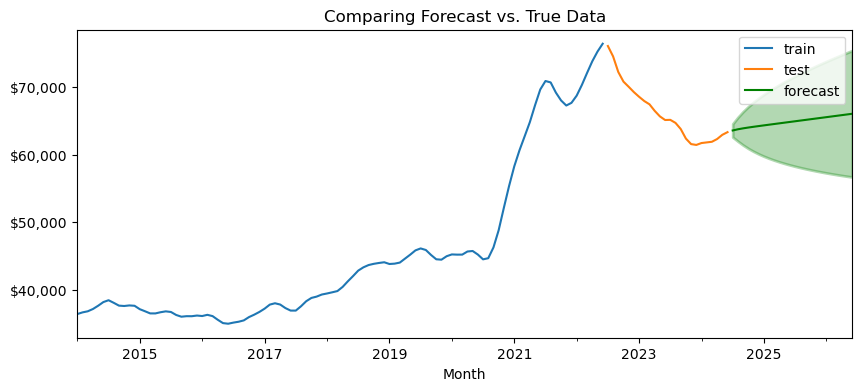

In [349]:
import pmdarima as pm

ZIP_RESULTS = {}


auto_arima_kws = dict(start_p=0, start_q=0,
                            max_p=5, max_q=5, 
                            seasonal=True,
                            start_P=0, start_Q=0,
                            max_P=5, max_Q=5,
                            m=12,
                            #  d=d, D=1,
                            trace=False, #True
                            error_action='ignore',  # don't want to know if an order does not work
                            suppress_warnings=True,  # don't want convergence warnings
                            stepwise=True)

for i,zipcode in enumerate(zipcode_list):
    # Save zipcode
    header = '='*80
    print(f"{header}\n- Processing Zipcode: {zipcode} ({i} of {len(zipcode_list)})\n{header}")
    ts  = df_ts.loc['2014':, zipcode].copy()
    
    
    train, test = pm.model_selection.train_test_split(ts, test_size=12*2)
    # ax = train.plot(label='Train', style='-.')
    # test.plot(ax=ax, label='Test', style='-.')

    ax.legend(bbox_to_anchor=(1.05, 1))
    ax.set(title=f'Home Values for Selected Top Zipcode: {zipcode}', ylabel='Home Value');
    
    
    ## Fit auto arima model
    stepwise_fit = pm.auto_arima(ts, **auto_arima_kws )  # 
    # display(stepwise_fit.summary())
    # stepwise_fit.plot_diagnostics();
    
    if 'intercept' in stepwise_fit.params():
        trend = 'c'
    else:
        trend = None
    
    ## Recreate the best model with just training data
    best_model = tsa.SARIMAX(train, order=stepwise_fit.order, 
                         seasonal_order=stepwise_fit.seasonal_order,
                         trend=trend
                         ).fit()
    display(best_model.summary())
    best_model.plot_diagnostics();
    
    # Get the forecast dataframe for test period
    forecast_df = best_model.get_forecast(steps=len(test)).summary_frame()
    # plt.figure()
    
    fig_train_test,ax = plot_forecast(train, test, forecast_df);
    plt.show()
    fn.regression_metrics_ts(ts_true=test, ts_pred=forecast_df['mean'])
    regr_metric = fn.regression_metrics_ts(ts_true=test, ts_pred=forecast_df['mean'], output_dict=True  )
    
    ## Final Model + Future Forecast
    final_model = tsa.SARIMAX(ts, order=stepwise_fit.order, 
                         seasonal_order=stepwise_fit.seasonal_order,
                         trend=trend).fit()
    display(final_model.summary())
    final_model.plot_diagnostics();
    
    # Get the forecast dataframe for test period
    final_forecast_df = final_model.get_forecast(steps=len(test)).summary_frame()
    fig_final, ax = plot_forecast(train, test, final_forecast_df);    
    
    ZIP_RESULTS[zipcode] = dict(auto_arima=stepwise_fit, 
                                metrics = regr_metric,
                                train_test_forecast=forecast_df,
                                train_test_forecst_fig = fig_train_test,
                                final_model=final_model, 
                                final_forecast = final_forecast_df,
                                final_forecast_fig = fig_final)

    

## Analyzing Results

> 1. Which zipcodes could we create valid models for?
>2. Of those zipcodes, which 3 would have the highest return on investment?

In [350]:
ZIP_RESULTS.keys()

dict_keys(['21770', '21780', '20625', '21651', '21628', '21223'])

In [351]:
zipcode = zipcode_list[0]
zipcode

'21770'

In [352]:
ZIP_RESULTS[zipcode].keys()

dict_keys(['auto_arima', 'metrics', 'train_test_forecast', 'train_test_forecst_fig', 'final_model', 'final_forecast', 'final_forecast_fig'])

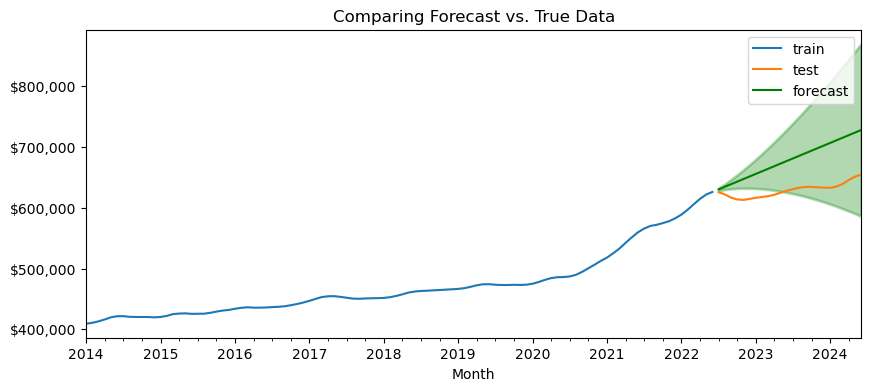

{'Label': '',
 'MAE': 50307.13684013367,
 'MSE': 2928118003.43293,
 'RMSE': 54112.08740598472,
 'MAPE(%)': 7.962862761397643,
 'R^2': -21.935085584319253,
 "Thiel's U": 18.286786491193414}

In [353]:
display(ZIP_RESULTS[zipcode]['train_test_forecst_fig'])
display(ZIP_RESULTS[zipcode]['metrics'])


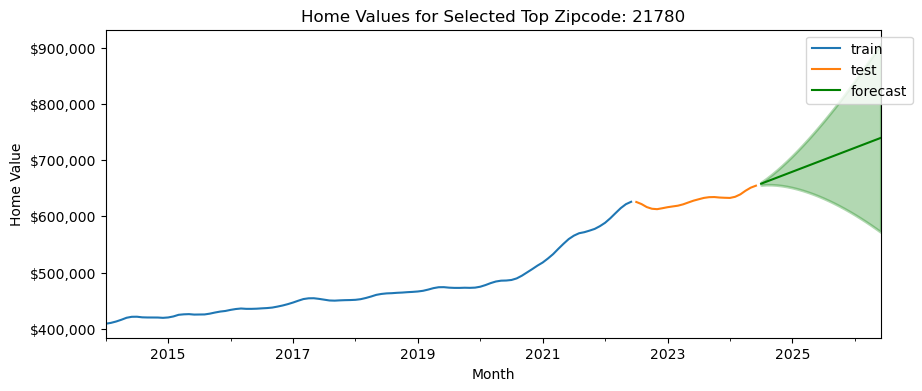

21770,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-07-31,658041.272575,1219.498498,655651.099440,660431.445710
2024-08-31,661579.712679,2726.881540,656235.123071,666924.302288
2024-09-30,665118.152784,4562.945563,656174.943816,674061.361751
2024-10-31,668656.592888,6679.468362,655565.075463,681748.110314
2024-11-30,672195.032993,9044.042916,654469.034603,689921.031382
2024-12-31,675733.473097,11633.274233,652932.674578,698534.271616
2025-01-31,679271.913201,14429.300819,650991.003274,707552.823129
2025-02-28,682810.353306,17417.922484,648671.852551,716948.854061
2025-03-31,686348.793410,20587.504151,645998.026742,726699.560079
2025-04-30,689887.233515,23928.288402,642988.650035,736785.816994


In [354]:
display(ZIP_RESULTS[zipcode]['final_forecast_fig'])
ZIP_RESULTS[zipcode]['final_forecast']

### Combining The Forecasts for Each Zipcode

In [355]:
# ##Combine the final forecast_dfs
final_forecasts_dfs_list = {zipcode:ZIP_RESULTS[zipcode]['final_forecast']['mean'] for zipcode in zipcode_list}
final_forecasts_dfs = pd.concat(final_forecasts_dfs_list,axis=1)
final_forecasts_dfs

,21770,21780,20625,21651,21628,21223
2024-07-31,658041.272575,373771.047002,359770.728210,330631.525222,320023.987117,63585.327450
2024-08-31,661579.712679,375017.808908,360828.153103,332519.899029,322320.450919,63760.852739
2024-09-30,665118.152784,376264.570813,361885.577997,334408.245558,324616.914720,63899.366555
2024-10-31,668656.592888,377511.332719,362943.002890,336296.591272,326913.378521,64019.254985
2024-11-30,672195.032993,378758.094625,364000.427783,338184.936962,329209.842322,64129.770509
2024-12-31,675733.473097,380004.856531,365057.852677,340073.282651,331506.306123,64235.569281
2025-01-31,679271.913201,381251.618437,366115.277570,341961.628340,333802.769924,64338.994428
2025-02-28,682810.353306,382498.380342,367172.702463,343849.974030,336099.233726,64441.225089
2025-03-31,686348.793410,383745.142248,368230.127357,345738.319719,338395.697527,64542.854646
2025-04-30,689887.233515,384991.904154,369287.552250,347626.665408,340692.161328,64644.181708


In [356]:

# Save the investment cost and returns
investment_cost = final_forecasts_dfs.iloc[0]
forecasted_price = final_forecasts_dfs.iloc[-1]

# Calculate Returns and ROI
returns = forecasted_price - investment_cost
roi = returns / investment_cost  * 100

# roi_df = pd.concat([returns, roi, investment],axis=1, keys=['Returns','ROI(%)']).sort_values('ROI(%)', ascending=False)
roi_df = pd.DataFrame({'Returns':returns, 'ROI(%)':roi, 'Investment':investment_cost, "Forecasted Price":forecasted_price})
roi_df = roi_df.sort_values('ROI(%)', ascending=False).round(2)
roi_df

,Returns,ROI(%),Investment,Forecasted Price
21628,52818.67,16.50,320023.99,372842.65
21651,43431.98,13.14,330631.53,374063.51
21770,81384.12,12.37,658041.27,739425.39
21780,28675.52,7.67,373771.05,402446.57
20625,24320.77,6.76,359770.73,384091.50
21223,2473.45,3.89,63585.33,66058.78


Text(0, 0.5, 'ROI(%)')

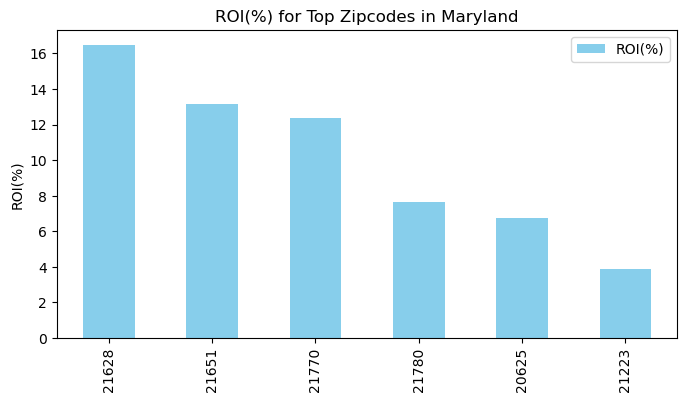

In [357]:
ax = roi_df.plot(y='ROI(%)', kind='bar', figsize=(8,4), color='skyblue', title='ROI(%) for Top Zipcodes in Maryland');
ax.set_ylabel('ROI(%)')

Text(0, 0.5, 'Returns($)')

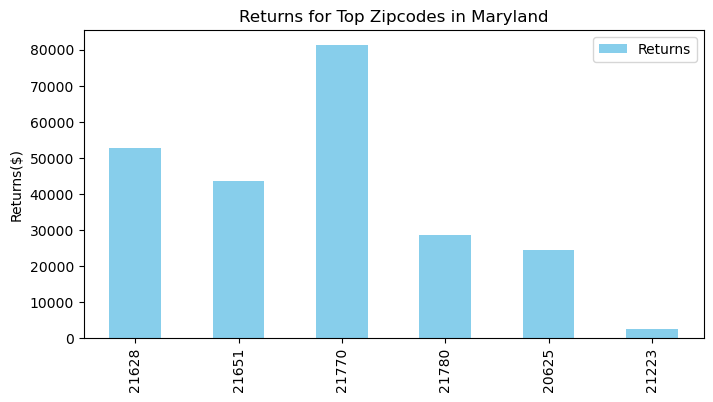

In [358]:
ax = roi_df.plot(y='Returns', kind='bar', figsize=(8,4), color='skyblue', title='Returns for Top Zipcodes in Maryland');
ax.set_ylabel('Returns($)')

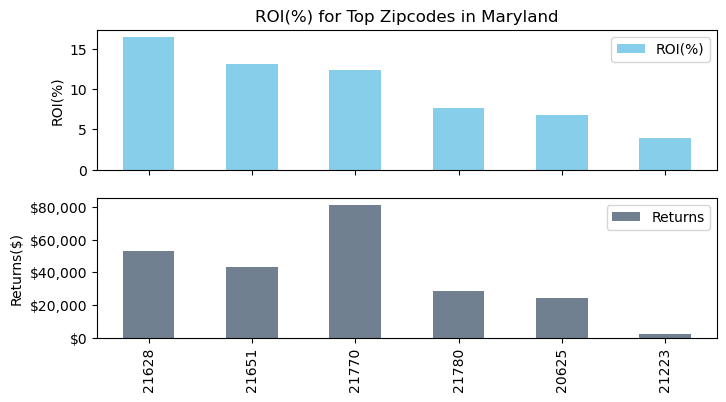

In [359]:
# Plot the ROI and Returns on separate axes
fig, axes = plt.subplots(figsize=(10, 5), nrows=2, sharex=True)
roi_df.plot(y='ROI(%)', kind='bar', figsize=(8,4), color='skyblue', title='ROI(%) for Top Zipcodes in Maryland',
            ax=axes[0]);
axes[0].set_ylabel('ROI(%)')

roi_df.plot(y='Returns', kind='bar', figsize=(8,4), color='slategray', #title='Returns for Top Zipcodes in Maryland',
            ax=axes[1]);
axes[1].set_ylabel('Returns($)')
# Format y-axis as currency
axes[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

### Determining Final Recocmmended Zipcodes

In [363]:
top3_zips_roi  = roi_df['ROI(%)'].sort_values(ascending=False).head(3)
top3_zips_returns = roi_df['Returns'].sort_values(ascending=False).head(3)
top3_zips_roi.sort_index(), top3_zips_returns.sort_index()

(21628    16.50
 21651    13.14
 21770    12.37
 Name: ROI(%), dtype: float64,
 21628    52818.67
 21651    43431.98
 21770    81384.12
 Name: Returns, dtype: float64)

In [368]:
# Get the final top 3 zipcodes
top3_zips_final = top3_zips_roi.index.intersection(top3_zips_returns.index)
top3_zips_final

Index(['21628', '21651', '21770'], dtype='object')

Zipcode: 21628


{'Label': '',
 'MAE': 25890.030511718145,
 'MSE': 746068008.9661201,
 'RMSE': 27314.24553170232,
 'MAPE(%)': 8.935841148117955,
 'R^2': -2.486100187045364,
 "Thiel's U": 10.434512096732975}

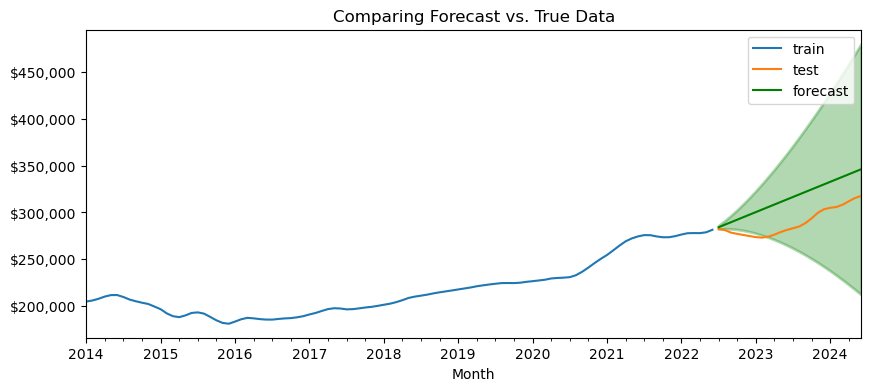

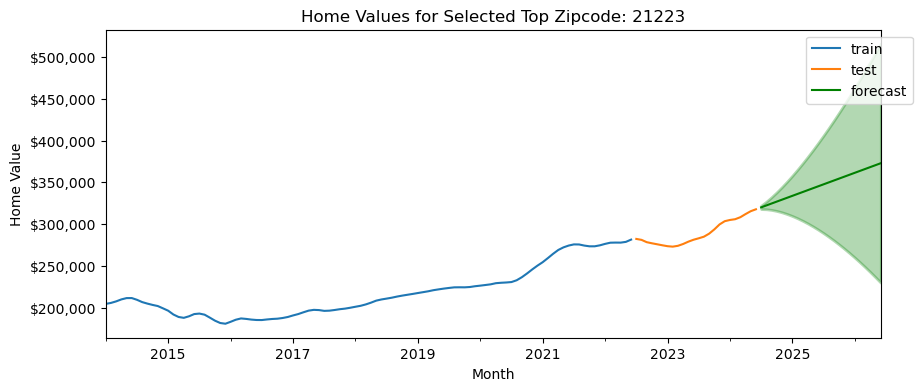

Zipcode: 21651


{'Label': '',
 'MAE': 33990.84427672171,
 'MSE': 1331228069.3951375,
 'RMSE': 36485.998265021306,
 'MAPE(%)': 10.879536165150656,
 'R^2': -12.63116520537759,
 "Thiel's U": 18.62537696164511}

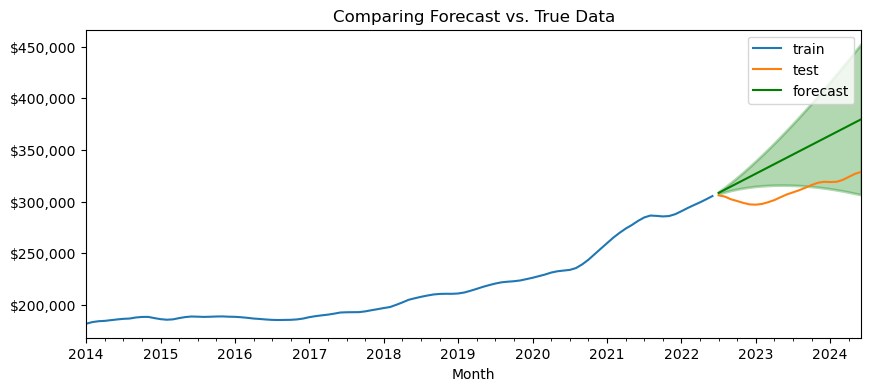

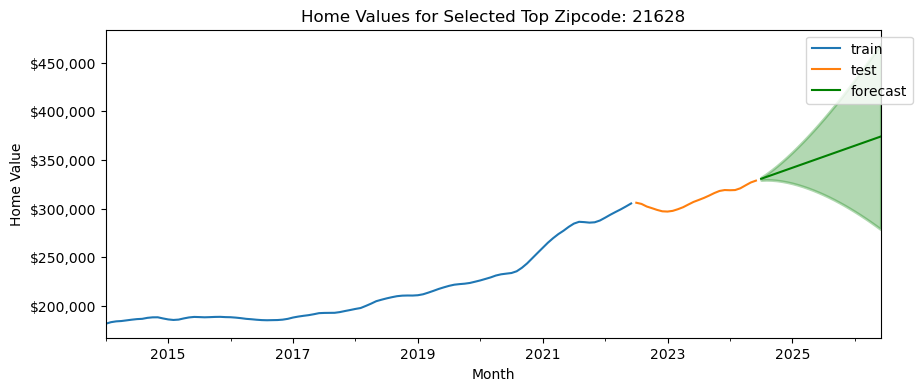

Zipcode: 21770


{'Label': '',
 'MAE': 50307.13684013367,
 'MSE': 2928118003.43293,
 'RMSE': 54112.08740598472,
 'MAPE(%)': 7.962862761397643,
 'R^2': -21.935085584319253,
 "Thiel's U": 18.286786491193414}

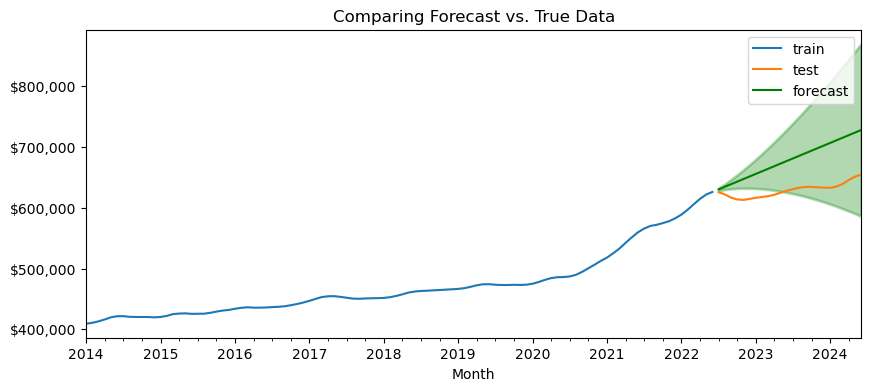

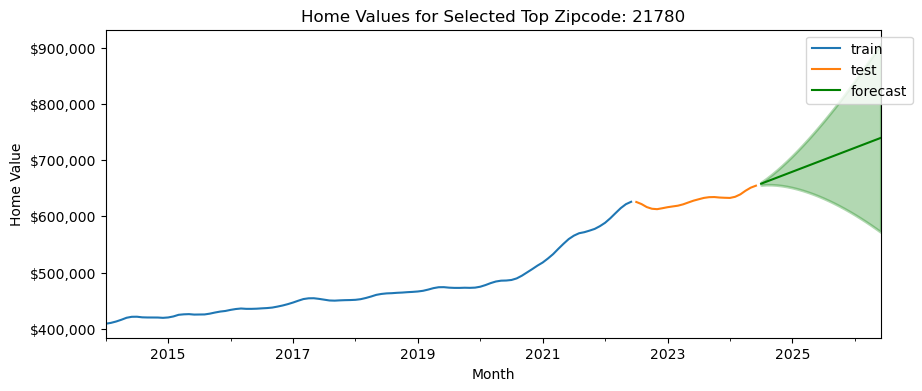

In [373]:
for zipcode in top3_zips_final:#ZIP_RESULTS.keys():
    print(header, f"Zipcode: {zipcode}", header, sep='\n')
    display(ZIP_RESULTS[zipcode]['metrics'])
    display(ZIP_RESULTS[zipcode]['train_test_forecst_fig'])
    display(ZIP_RESULTS[zipcode]['final_forecast_fig'])

# Final Report

## Introduction
This report presents the findings from our analysis of Zillow home value data to identify the top three zip codes in the Baltimore-Washington area for real estate investment.

## Methodology
- Data Collection
- Data Preparation
- Time Series Modeling
- Evaluation and Selection

## Results
- Top 3 Zip Codes: {top_zipcodes}
- Forecasted ROI
- Evaluation Metrics: RMSE, MAE

## Recommendations
Based on our analysis, we recommend investing in the identified top zip codes for maximum ROI over the next three years.

# Appendix

### TO DO: Plot twinx with ROI and Returns
- Issue: overlappng bars

Text(0, 0.5, 'Returns($)')

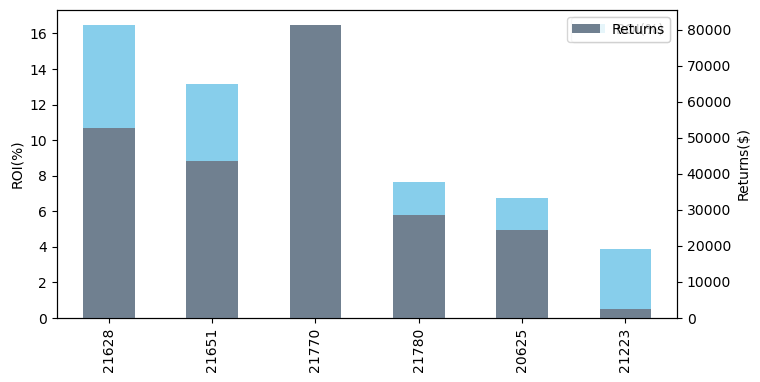

In [290]:
# Plot the ROI and Returns on separate axes
fig, ax1 = plt.subplots(figsize=(10, 5))
roi_df.plot(y='ROI(%)', kind='bar', figsize=(8,4), color='skyblue', #title='ROI(%) for Top Zipcodes in Maryland',
            ax=ax1);
ax1.set_ylabel('ROI(%)')

ax2 = ax1.twinx()
roi_df.plot(y='Returns', kind='bar', figsize=(8,4), color='slategray', #title='Returns for Top Zipcodes in Maryland',
            ax=ax2);
ax2.set_ylabel('Returns($)')

In [254]:
# # Combine final forecasts dfs
# final_forecasts = []
# for zipcode in zipcode_list:
#     forecast = ZIP_RESULTS[zipcode]['final_forecast']
#     forecast['zipcode'] = zipcode
#     forecast.index.name = "Month"
#     final_forecasts.append(forecast)
    
#     # print(ZIP_RESULTS[zipcode]['final_forecast'].columns)
# final_forecast_df =pd.concat(final_forecasts)
# final_forecast_df

In [249]:
# ## Pivot to make the zipcode as columns
# # final_forecast_df = 
# final_forecast_df.pivot_table(index='zipcode', columns='index')


### Adding Fourier Features

In [166]:
# ### 07/14/24 for Ben
# import pmdarima as pm
# from pmdarima import pipeline
# from pmdarima import model_selection
# from pmdarima import preprocessing as ppc
# from pmdarima import arima



# pipe = pipeline.Pipeline([
#     ('boxcox', ppc.BoxCoxEndogTransformer(lmbda2=1e-6)),
#     # ("fourier", ppc.FourierFeaturizer(m=12, k=3)),
#     ("arima", arima.AutoARIMA(**auto_arima_kws))
# ])

# pipe

In [167]:
# results = pipe.fit(ts)
# display(results.summary())
# # results.named_steps['arima'].plot_diagnostics()

In [168]:

# # Extract the AutoARIMA model from the pipeline
# auto_arima_model = pipe.named_steps['arima']

# best_model = auto_arima_model.model_

# # Get the best model parameters
# best_order = best_model.order
# best_seasonal_order = best_model.seasonal_order

# # Print the best parameters
# print("Best ARIMA order:", best_order)
# print("Best seasonal order:", best_seasonal_order)

# # You can also access the summary of the best model
# print(auto_arima_model.summary())

In [153]:
# pipe.predict()

In [169]:
# n_lags_forecast = len(test)

# forecast, conf_ints = pipe.predict(n_lags_forecast, return_conf_int=True, alpha=0.05)

# forecast_df = pd.DataFrame({'forecast': forecast, 'lower': conf_ints[:, 0], 'upper': conf_ints[:, 1]},
#                            index=pd.date_range(start=test.index[0], periods=n_lags_forecast, freq='M'))


# ax= train.plot(label='Train')
# test.plot(ax=ax, label='Test')
# forecast_df['forecast'].plot(ax=ax,label='Forecast', marker='.')
# ax.fill_between(forecast_df.index, forecast_df['lower'], forecast_df['upper'], alpha=0.3);
